In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
import pyspark.sql.functions as f
from urllib.request import urlopen
from functools import reduce

spark = SparkSession \
        .builder \
        .master('local[*]') \
        .getOrCreate()

VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

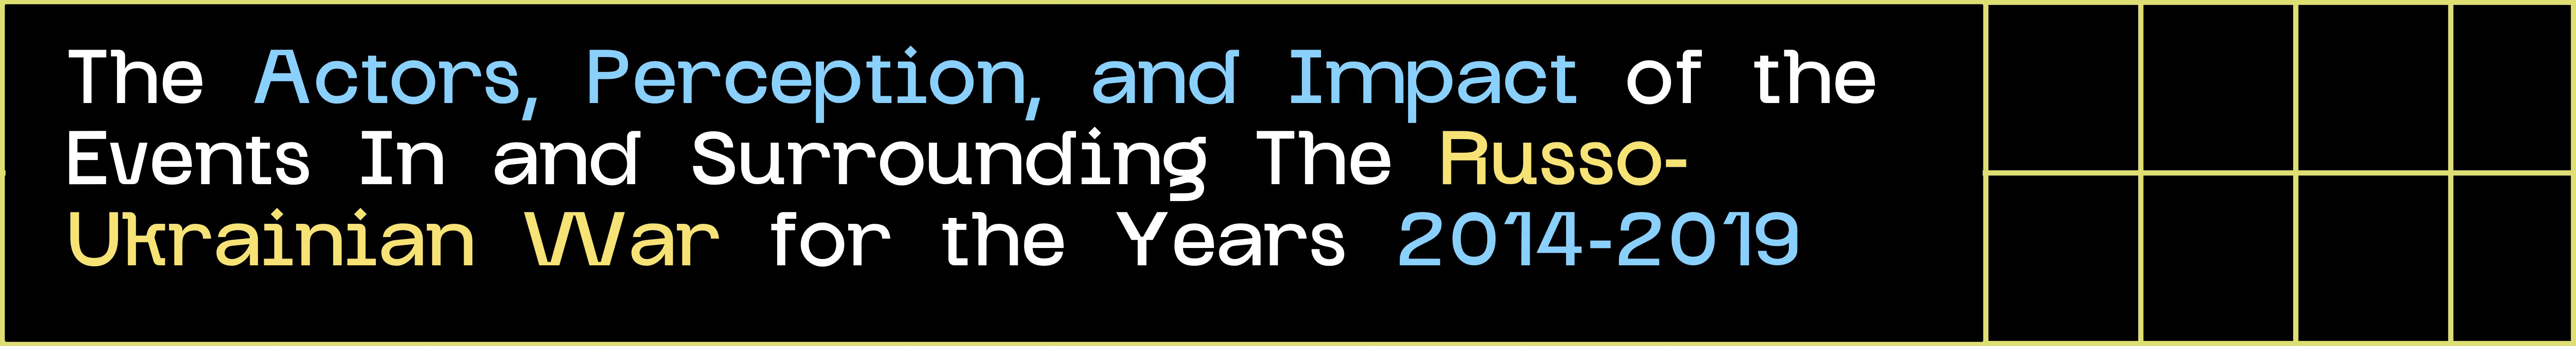

# EXECUTIVE SUMMARY

**Background**<br>
The Russo-Ukrainian War has existed since 2014. World leaders have tried to negotiate a stop to the war to no avail; escalations worsened as Russia invaded Ukraine, and has continued to do so as of writing, in early 2022. A common question among the public is how decision-makers arrived at this outcome; this requires an understanding of the events in and surrounding the war – both in the physical and in the digital. In this report, we use publicly available data to identify and determine the actors, perceptions, and impacts of the events leading up to the 2022 invasion.

**Methods**<br>
We used the Global Database of Events, Language and Tone (GDELT) Dataset available at the AWS Registry of Open Data. Limiting the scope to the years 2014 to 2019 only, we accessed the dataset by initializing the necessary instances and machines at AWS EC2, EMS, S3 and connecting to the appropriate bucket. We then converted the RDD into Spark DataFrames for convenient manipulation and preprocessing. The resulting file was saved in Parquet format, where relevant tables and results were retrieved using Spark SQL. We used Python3 to generate selected visualizations.

**Results**<br>
Salient results from the analysis include the following:
1.	*On Actors*: Vladimir Putin is a significant actor, where portrayal of the media towards Russia almost always includes him.
2.	*On Perception*: The start of the Russo-Ukrainian War in 2014 was perceived positively by the media and other countries, possibly due to the narrative like that of David versus Goliath (a smaller country versus a larger country). Perception from 2015 onwards became paler in comparison. 
3.	*On Impact*: Country instability was quantitatively evaluated using the Goldstein Scale. The *relationship between Ukraine and Russia* has resulted in a lower Goldstein Scale as their actions towards each other are leading to each other’s instability.  While *Ukraine’s Goldstein Scale with other countries* experienced an initially very low score during 2014, *Russia’s Goldstein Scale with other countries* indicates that it is almost invincible when it comes to instability, owing to its massive political and economic power.

**Conclusion and Recommendations**<br>
We were able to provide a high-level analysis of the events in and surrounding the war, and, in particular, the media’s treatment towards Ukraine and Russia jointly and individually as the events happened. We suggest conducting further research on the historical context to validate the above findings and collect more information for 2020 and 2021 in order to fully understand the Russo-Ukrainian War and its many complexities. 

# INTRODUCTION
It has been 1.5 weeks since Russia has officially invaded Ukraine at time of writing. While Putin has declared it as a “demilitarization” of Ukraine’s capital, it is, in fact as recognized by most countries, a war that has occurred since 2014 ([Dress, 2022](#dress)). Initially, it included the politically contentious areas of Crimea and Donbas; since then, conflict has ranged from the physical (Russia has been present at the areas since 2014) to the digital (cyberwarfare has further intensified in recent months, which started from organized hacking around the initial days of war in 2014). In this report, we provide a high-level overview on how the media perceived the Ukraine-Russia conflict in the years of 2014 and 2019 as a precursor of the 2022 Russian invasion of Ukraine.

## Background
### Revolution of Dignity
Violent protests happened in Ukraine during February 2014, following the eviction of then-Ukrainian President President Viktor Yanukovych and his government ([Kharkiv, Kiev & Lviv, 2014](#kharkiv)). It was closely related to his decision not to be part of the European Union and, instead, be closer to Russia ([Kyiv Post, 2013](#kyiv)). While an interim government was added in place of the former government, Russia was slowly increasing its military presence in Crimea, a peninsula at the south of Ukraine.

### Annexation of Crimea and War in Donbas
During the 20th of February 2014, Russia annexed Crimea and has formally taken control of the area, captured political structures and raising Russian flags, in addition to its attack of Ukraine’s government and social media websites ([Cathcart, 2014](#cathcart)). The area has been under Russian control since then. Outside institutions have denounced Russia’s actions, including the United Nations General Assembly ([United Nations, 2014](#united)).  

## Motivation
Given recent events surrounding both Ukraine and Russia, this report explores and assess how the situation was perceived by news outlets as reported through different platforms between the years 2014 and 2019. In so doing, this may aid in understanding the level of engagement and support provided by multiple countries and organizations leading up to the 2022 invasion.

## Research Questions
For news about Russia and Ukraine for the years 2014 (start of the war) and 2019 (6 years after the start of the war):
1. Actors: Who are the most prominent and significant actors/people mentioned by the media?
2. Perception: How did the media perceive the war in terms of tone and mentions?
3. Impact: What is the theoretical potential (positive and negative) impact on the stability of a country?

## Scope and Limitations
This study is subject to the following scope and limitations:
1.	Contextualization of the results may be subject to bias. The authors claim no expertise in geopolitics. We nevertheless provided extensive research as required to situate the data and results in the proper context.
2.	Limiting the scope between 2014 and 2019 due to data limitations. The authors made no material changes to the data provided through the registry. While experts may have helped in validating the information collected, we did not include this given the limited time provided. In addition, the dataset is only limited up to the year 2019.

# DATA

## Data Set Description
The `Global Database of Events, Language and Tone (GDELT)` dataset was retrieved from the AWS Registry of Open Datasets ([GDELT Project, 2020](#gdelt)). It periodically crawls and monitors many broadcasts, print, and web news from “nearly every country”. Its maintainers quantitatively codify events, conflicts, and reactions every 15 minutes. It has been used in understanding historical context, given its coverage back to the year 1800, as well as observing emerging media given its scope. The data is made publicly available for unlimited and unrestricted use by the GDELT Project. We provide details on the schema below:

<center>Table 1. Data Fields of the GDELT Dataset</center>

|     Field                    |     Type      |     Description                                                                                                                                                                          |
|:------------------------------|:---------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|     GLOBALEVENTID            |     string    |     Globally unique identifier assigned to each event   record that uniquely identifies it in the master dataset                                                                         |
|     SQLDATE                  |     date      |     Date the event took place                                                                                                                                                            |
|     MonthYear                |     date      |     Alternative formatting of the event date                                                                                                                                             |
|     Year                     |     date      |     Alternative formatting of the event date                                                                                                                                             |
|     FractionDate             |     date      |     Alternative formatting of the event date                                                                                                                                             |
|     Actor1Code               |     string    |     The complete raw CAMEO code for Actor1                                                                                                                                               |
|     Actor1Name               |     string    |     The actual name of the Actor1                                                                                                                                                        |
|     Actor1CountryCode        |     string    |     The 3-character CAMEO code for the country   affiliation of Actor1                                                                                                                   |
|     Actor1KnownGroupCode     |     string    |     If Actor1 is a known IGO/NGO/rebel organization   (United Nations, World Bank, al-Qaeda, etc) with its own CAMEO code, this   field will contain that code                           |
|     Actor1EthnicCode         |     string    |     If the source document specifies the ethnic   affiliation of Actor1 and that ethnic group has a CAMEO entry, the CAMEO code   is entered here                                        |
|     Actor1Religion1Code      |     string    |     If the source document specifies the religious   affiliation of Actor1 and that religious group has a CAMEO entry, the CAMEO   code is entered here                                  |
|     Actor1Religion2Code      |     string    |     If multiple religious codes are specified for   Actor1, this contains the secondary code                                                                                             |
|     Actor1Type1Code          |     string    |     The 3-character CAMEO code of the CAMEO “type” or   “role” of Actor1, if specified                                                                                                   |
|     Actor1Type2Code          |     string    |     If multiple type/role codes are specified for   Actor1, this returns the second code                                                                                                 |
|     Actor1Type3Code          |     string    |     If multiple type/role codes are specified for   Actor1, this returns the third code                                                                                                  |
|     Actor2Code               |     string    |     The 3-character CAMEO code for the country   affiliation of Actor2                                                                                                                   |
|     Actor2Name               |     string    |     The actual name of the Actor2                                                                                                                                                        |
|     Actor2CountryCode        |     string    |     The 3-character CAMEO code for the country affiliation   of Actor2                                                                                                                   |
|     Actor2KnownGroupCode     |     string    |     If Actor2 is a known IGO/NGO/rebel organization   (United Nations, World Bank, al-Qaeda, etc) with its own CAMEO code, this   field will contain that code                           |
|     Actor2EthnicCode         |     string    |     If the source document specifies the ethnic   affiliation of Actor1 and that ethnic group has a CAMEO entry, the CAMEO code   is entered here                                        |
|     Actor2Religion1Code      |     string    |     If the source document specifies the religious   affiliation of Actor1 and that religious group has a CAMEO entry, the CAMEO   code is entered here                                  |
|     Actor2Religion2Code      |     string    |     If multiple religious codes are specified for   Actor2, this contains the secondary code                                                                                             |
|     Actor2Type1Code          |     string    |     The 3-character CAMEO code of the CAMEO “type” or   “role” of Actor2, if specified                                                                                                   |
|     Actor2Type2Code          |     string    |     If multiple type/role codes are specified for   Actor2, this returns the second code                                                                                                 |
|     Actor2Type3Code          |     string    |     If multiple type/role codes are specified for   Actor2, this returns the third code                                                                                                  |
|     IsRootEvent              |     string    |     The system codes every event found in an entire   document, using an array of techniques to deference and link information   together                                                |
|     EventCode                |     string    |     This is the raw CAMEO action code describing the   action that Actor1 performed upon Actor2                                                                                          |
|     EventBaseCode            |     string    |     CAMEO event codes are defined in a three-level   taxonomy. For events at level three in the taxonomy, this yields its level   two leaf root node                                     |
|     EventRootCode            |     string    |     Similar to EventBaseCode, this defines the   root-level category the event code falls under                                                                                          |
|     QuadClass                |     string    |     This field specifies this primary classification for   the event type, allowing analysis at the highest level of aggregation                                                         |
|     GoldsteinScale           |     int       |     A numeric score from -10 to +10, capturing the   theoretical potential impact that type of event will have on the stability of   a country                                           |
|     NumMentions              |     int       |     This is the total number of mentions of this event   across all source documents                                                                                                     |
|     NumSources               |     int       |     This is the total number of information sources   containing one or more mentions of this event                                                                                      |
|     NumArticles              |     int       |     This is the total number of source documents   containing one or more mentions of this event                                                                                         |
|     AvgTone                  |     int       |     This is the average “tone” of all documents   containing one or more mentions of this event                                                                                          |
|     Actor1Geo_Type           |     string    |     This field specifies the geographic resolution of   the match type                                                                                                                   |
|     Actor1Geo_FullName       |     string    |     This is the full human-readable name of the matched   location                                                                                                                       |
|     Actor1Geo_CountryCode    |     string    |     This is the 2-character FIPS10-4 country code for   the location                                                                                                                     |
|     Actor1Geo_ADM1Code       |     string    |     This is the 2-character FIPS10-4 country code   followed by the 2-character FIPS10-4 administrative division 1 (ADM1) code   for the administrative division housing the landmark    |
|     Actor1Geo_Lat            |     int       |     This is the centroid latitude of the landmark for   mapping                                                                                                                          |
|     Actor1Geo_Long           |     int       |     This is the centroid longitude of the landmark for   mapping                                                                                                                         |
|     Actor1Geo_FeatureID      |     string    |     This is the GNS or GNIS FeatureID for this location                                                                                                                                  |
|     Actor2Geo_Type           |     string    |     This field specifies the geographic resolution of   the match type                                                                                                                   |
|     Actor2Geo_FullName       |     string    |     This is the full human-readable name of the matched   location                                                                                                                       |
|     Actor2Geo_CountryCode    |     string    |     This is the 2-character FIPS10-4 country code for   the location                                                                                                                     |
|     Actor2Geo_ADM1Code       |     string    |     This is the 2-character FIPS10-4 country code   followed by the 2-character FIPS10-4 administrative division 1 (ADM1) code   for the administrative division housing the landmark    |
|     Actor2Geo_Lat            |     int       |     This is the centroid latitude of the landmark for   mapping                                                                                                                          |
|     Actor2Geo_Long           |     int       |     This is the centroid longitude of the landmark for   mapping                                                                                                                         |
|     Actor2Geo_FeatureID      |     string    |     This is the GNS or GNIS FeatureID for this location                                                                                                                                  |
|     ActionGeo_Type           |     string    |     This field specifies the geographic resolution of   the match type                                                                                                                   |
|     ActionGeo_FullName       |     string    |     This is the full human-readable name of the matched   location                                                                                                                       |
|     ActionGeo_CountryCode    |     string    |     This is the 2-character FIPS10-4 country code for   the location                                                                                                                     |
|     ActionGeo_ADM1Code       |     string    |     This is the 2-character FIPS10-4 country code   followed by the 2-character FIPS10-4 administrative division 1 (ADM1) code   for the administrative division housing the landmark    |
|     ActionGeo_Lat            |     int       |     This is the centroid latitude of the landmark for   mapping                                                                                                                          |
|     ActionGeo_Long           |     int       |     This is the centroid longitude of the landmark for   mapping                                                                                                                         |
|     ActionGeo_FeatureID      |     string    |     This is the GNS or GNIS FeatureID for this location                                                                                                                                  |
|     DATEADDED                |     date      |     This field stores the date the event was added to   the master database                                                                                                              |
|     SOURCEURL                |     string    |     This field lists the URL of the news article the   event was found in                                                                                                                |

## Summary Statistics

In [2]:
df = spark.read.parquet('s3://bdcc-lab2-bucket/df.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
print('Number of Rows: ', df.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Rows:  356198797

Using the data from 2014 to 2019, we retrieved a total of 356,198,797 rows. Accessing the dataset through Parquet has made retrieval easier, with runtimes for most codes below running for 2 minutes or less.

In [4]:
df.createOrReplaceTempView('df')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
print('Table 2. Top 30 Common Country Codes for years 2014-2019')
(spark.sql("""SELECT actor1countrycode, COUNT(*) as count
              FROM df
              WHERE actor1countrycode != ''
              GROUP BY actor1countrycode
              ORDER BY count DESC
              """).show(30, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 2. Top 30 Common Country Codes for years 2014-2019
+-----------------+--------+
|actor1countrycode|count   |
+-----------------+--------+
|USA              |63439519|
|GBR              |9538559 |
|CHN              |6180063 |
|RUS              |6008349 |
|CAN              |4868165 |
|AUS              |4803927 |
|ISR              |4167078 |
|FRA              |3762667 |
|NGA              |3635236 |
|PAK              |3542954 |
|IND              |3460544 |
|IRN              |3173419 |
|TUR              |3067468 |
|DEU              |3022590 |
|SYR              |2982951 |
|EUR              |2750568 |
|AFR              |2577926 |
|JPN              |2413110 |
|PHL              |2168304 |
|SAU              |2040750 |
|AFG              |1991527 |
|IRQ              |1851519 |
|IRL              |1718524 |
|ITA              |1673301 |
|EGY              |1640378 |
|PSE              |1548844 |
|UKR              |1547428 |
|MEX              |1493059 |
|KOR              |1429174 |
|MYS           

The United States of America was ranked first with most events found in the database for years 2014-2019. This is followed by United Kingdom (`GBR`), China (`CHN`) and Russia (`RUS`). Ukraine (`UKR`) was only ranked 27th in the list.

In [6]:
print('Table 3. Number of distinct countries per year in the database')
(df.select(df['Year'].cast('int'),
           df['Actor1CountryCode'].cast('string'))
   .groupby('Year')
   .agg(f.countDistinct('Actor1CountryCode').alias('count(countries)'))
   .orderBy('Year', ascending=True)
 .show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 3. Number of distinct countries per year in the database
+----+----------------+
|Year|count(countries)|
+----+----------------+
|2014|             224|
|2015|             224|
|2016|             223|
|2017|             223|
|2018|             223|
|2019|             221|
+----+----------------+

Yearly, almost all countries are reported by at least one news outlet that is part of the database. This has been reduced, slowly, between 2015 and 2019, from 224 up to 221.

# METHODOLOGY

We provide a three-stage process in doing the exploratory data analysis to achieve the report objectives.

<center>Figure 1. Methodology Workflow</center>

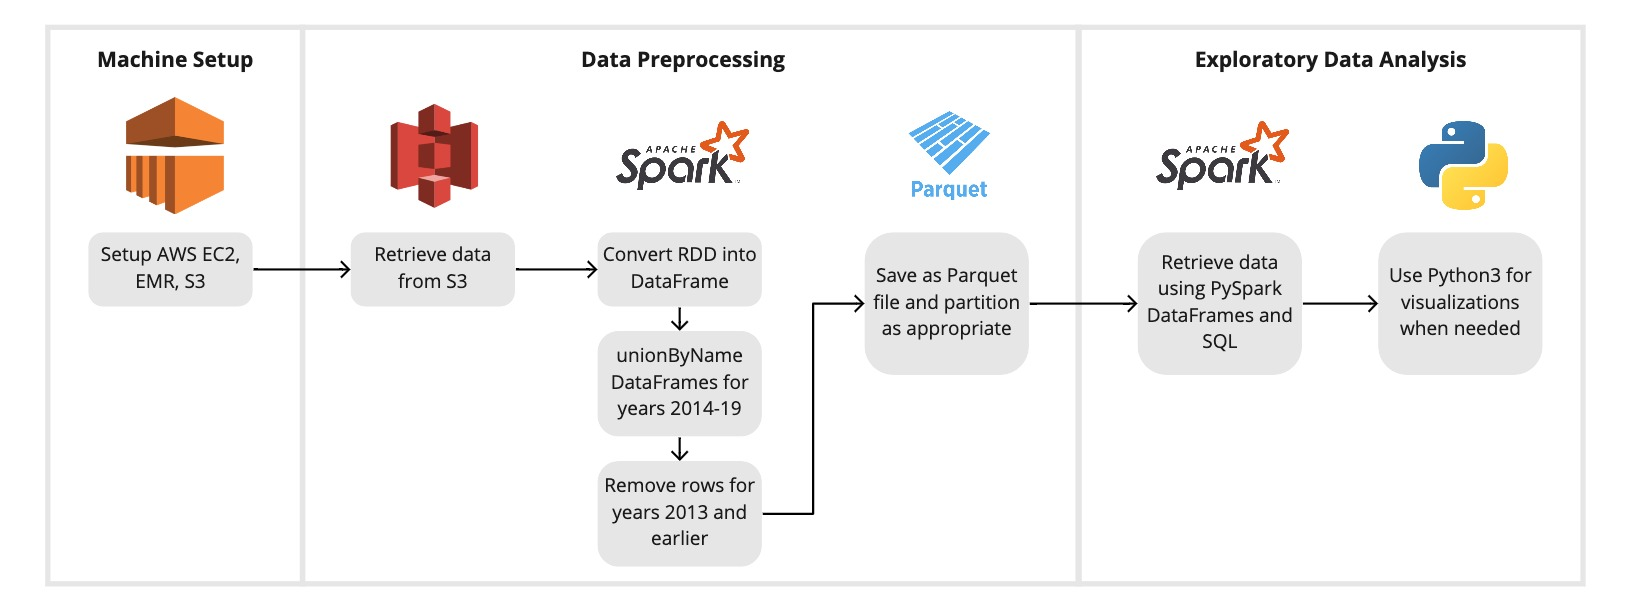

First, we initialized the necessary instances and machines required from AWS. We then preprocessed the data by retrieving it from the sources and doing the appropriate cleaning methods, which was done through PySpark given the large amount of data collected. This was then saved as Parquet and retrieved using PySpark and Python3. We provide full details on the process below.


## AWS setup

We experimented with different iterations of our AWS setup to optimize speed given the scale of the data we have used. Our final EMR setup includes the following:

<center>Table 4. Configuration Details of the used AWS Setup</center>


|     Configuration             |     Details                                                                                                                              |
|:-------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------|
|     EMR                       |     emr-6.5.0                                                                                                                            |
|     Hadoop distribution       |     Amazon 3.2.1                                                                                                                         |
|     Applications              |     Hive 3.1.2, Pig 0.17.0, Hue 4.9.0,   JupyterHub 1.4.1, JupyterEnterpriseGateway 2.1.0, Spark 3.1.2, Livy 0.7.1,   Zeppelin 0.10.0    |
|     Instance type (master)    |     1x m5.xlarge     4 vCore, 16 GiB memory, EBS only storage                                                                            |
|     Instance type (slave)     |     3x m5.xlarge     4 vCore, 16 GiB memory, EBS only storage     EBS Storage:200 GiB                                                    |
|     EBS Root Storage          |     100GiB                                                                                                                               |





## Get data from s3

The data from the years 2014 to 2019 was retrieved from `s3://gdelt-open-data/`. The authors decided to use this duration because 2014 was the first year of the Russo-Ukrainian War which has continued up to the present; 2019 is the latest year available in the database.

## Convert RDD into DataFrame

The retrieved data was converted into Spark Data Frames for convenient manipulation of the dataset as required by the exploratory data analysis.

## Join 2014-2019 DataFrames

A function was written to concatenate all DataFrames using PySpark’s `unionByName`. Different from `union`, `unionByName` resolves columns by name and not by position.

## Remove rows <= 2013

A quick inspection of the data revealed that rows of previous years were included in the s3 download. We removed all rows dated earlier than 2014.

## Save as parquet

Finally, to take advantage of the efficiency of Parquet we saved it in this data format, resulting to a total size of 26.7 GB (from a 4.5 TB bucket). We partitioned it by `Year` and `MonthYear` because retrieval of the data is usually referenced by the dates as later provided in our EDA.

## Pyspark SQL and PySpark DataFrames retrieval

The authors used separate notebooks to retrieve and explore the dataset using PySpark SQL and Spark DataFrame. The notebook `01_dataPreparation.ipynb` contains all the codes of the processes we just discussed.

## Transfer to Python3 for selected visualizations

Finally, PySpark is unable to provide visualizations using well-known Python libraries. We transferred selected *parquet* data frames into Python notebook within the same EMR to generate visualizations. The notebook `02_visualizations.ipynb` contains all the processes we did from transforming *parquet* files to Pandas data frame to plotting figures using `matplotlib`.

# EDA
## Prelude
*Defining Actors*
Important to note in the following paragraphs are the following: 
- By `Actor1` or `Actor2`, we are referring to persons, organizations, or groups that are involved in an event. 
- `Actor1` plays the active role of doing an action/event to `Actor2`. For example, in the headline “Popoy hurts Basha,” we have `Popoy` as `Actor1` and `Basha` as `Actor2`.

In [7]:
print('Table 5. Top 10 Actor1 with Most Mentions for years 2014-2019')
(df.select(df['NumMentions'].cast('int'),
           df['Actor1Name'].cast('string'))
   .filter(df['Actor1Name'] != '')
   .groupby('Actor1Name')
   .sum('NumMentions').alias('Total NumMentions')
   .orderBy('sum(NumMentions)', ascending=False)
 .show(10))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 5. Top 10 Actor1 with Most Mentions for years 2014-2019
+--------------+----------------+
|    Actor1Name|sum(NumMentions)|
+--------------+----------------+
| UNITED STATES|       426171884|
|        POLICE|       141348403|
|     PRESIDENT|        81271629|
|    GOVERNMENT|        79643415|
|UNITED KINGDOM|        57953776|
|        SCHOOL|        57533142|
|       COMPANY|        48044898|
|         CHINA|        45691924|
|        RUSSIA|        44898215|
|     AUSTRALIA|        43308314|
+--------------+----------------+
only showing top 10 rows

In [8]:
print('Table 6. Top 10 Actor2 with Most Mentions for years 2014-2019')
(df.select(df['NumMentions'].cast('int'),
           df['Actor2Name'].cast('string'))
   .filter(df['Actor2Name'] != '')
   .groupby('Actor2Name')
   .sum('NumMentions')
   .orderBy('sum(NumMentions)', ascending=False)
 .show(10))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 6. Top 10 Actor2 with Most Mentions for years 2014-2019
+--------------+----------------+
|    Actor2Name|sum(NumMentions)|
+--------------+----------------+
| UNITED STATES|       242493335|
|        POLICE|        65693044|
|    GOVERNMENT|        61271373|
|     PRESIDENT|        52680303|
|        SCHOOL|        43936912|
|UNITED KINGDOM|        36766940|
|        RUSSIA|        36063460|
|         CHINA|        34369771|
|        ISRAEL|        29413491|
|       STUDENT|        27404757|
+--------------+----------------+
only showing top 10 rows

Consistent with the above Table where the US ranks first, it is almost always the United States that figure in most of the headlines across the globe. Interestingly, it is the `POLICE` that ranks second in the list, much higher than `GOVERNMENT` or `PRESIDENT`, possibly given its role as a two-edged sword in serving and protecting either the state and/or citizens. `RUSSIA` are in both tables, indicating that it is an active actor that is widely reported across the world.

In [9]:
print('Table 7. AvgTone Statistical Table')
df.select(df.AvgTone).describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 7. AvgTone Statistical Table
+-------+--------------------+
|summary|             AvgTone|
+-------+--------------------+
|  count|           356198797|
|   mean| -1.3595736983003035|
| stddev|  3.9172240492805313|
|    min|-0.00010024278803...|
|    max|    9.99999999999999|
+-------+--------------------+

The documentation of GDELT describes `AvgTone` as a value that ranges from -100 to +100. However, for the years 2014-2019, raw `AvgTone` was within the range of 0 to +10. Included in the table is the average Tone gathered from the many news reports where the actor has been apart. Since a specific actor can be mentioned multiple times, we computed the mean of the `AvgTone` as an aggregated `AvgTone` score for that actor. This is a “subtle measure of the importance of an event and as a proxy for the “impact” of that event” (GDELT).

In [10]:
print('Table 8. Top 10 Actor1 with Highest Tones found'
      ' in the dataset for years 2014-2019')

(df.select(df['AvgTone'].cast('float'),
           df['Actor1Name'].cast('string'))
   .groupby('Actor1Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=False)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 8. Top 10 Actor1 with Highest Tones found in the dataset for years 2014-2019
+-------------------------------------------+------------------+
|Actor1Name                                 |avg(AvgTone)      |
+-------------------------------------------+------------------+
|AMBASSADOR FOR THE E                       |12.380952835083008|
|TAKIS CLERIDES                             |10.485701560974121|
|PATRICK LINTON ALLEN                       |10.257027258475622|
|UNITED CAPITAL CORPORATION                 |9.638554573059082 |
|UNIVERSAL GREAT BROTHERHOOD                |9.177215576171875 |
|NETAID                                     |9.072164535522461 |
|CLARIS CHARLES                             |8.885807991027832 |
|FAMILY CARE INTERNATIONAL                  |8.684863090515137 |
|INDEPENDENT FUNDAMENTAL CHURCHES OF AMERICA|8.510467052459717 |
|RASHID AL MARAJ                            |8.333333015441895 |
+-------------------------------------------+------------------+
only sh

Higher scores indicate positive perceptions of news reports about that particular actor; lower scores indicate the opposite. For instance, `PATRICK LINTON ALLEN` is a Jamaican politician and a pastor, which may indicate his highly respected status among the news reports.

In [11]:
print('Table 9. Top 10 Actor1 with Lowest Tones found'
      ' in the dataset for years 2014-2019')

(df.select(df['AvgTone'].cast('float'),
           df['Actor1Name'].cast('string'))
   .groupby('Actor1Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=True)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 9. Top 10 Actor1 with Lowest Tones found in the dataset for years 2014-2019
+---------------------------------------------------+-------------------+
|Actor1Name                                         |avg(AvgTone)       |
+---------------------------------------------------+-------------------+
|SABIR SINGH                                        |-15.744680404663086|
|CELESTIN MBUYU                                     |-13.288549065589905|
|SHINRIKYO                                          |-13.137032508850098|
|BOKASSA I                                          |-13.104476928710938|
|JAMMU AND KASHMIR ISLAMIC FRONT                    |-12.20763702392578 |
|UNITED LIBERATION MOVEMENT OF LIBERIA FOR DEMOCRACY|-12.100590374158775|
|FAROOQ PAWALE                                      |-11.788618087768555|
|ASGHAR MUKADAM                                     |-11.788618087768555|
|PHUTHAI                                            |-11.666666984558105|
|KEBEDE TADESSE               

Oppositely, `SHINRIKYO` is an underground religious cult, considered as a terrorist group, based in Japan.

In [12]:
print('Table 10. Top 10 Actor2 with Highest Tones found'
      ' in the dataset for years 2014-2019')

(df.select(df['AvgTone'].cast('float'),
           df['Actor2Name'].cast('string'))
   .groupby('Actor2Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=False)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 10. Top 10 Actor2 with Highest Tones found in the dataset for years 2014-2019
+-------------------------------+------------------+
|Actor2Name                     |avg(AvgTone)      |
+-------------------------------+------------------+
|NUSRATULLO SALIMOV             |13.612565040588379|
|SURMODICS INC                  |12.698412895202637|
|AMBASSADOR FOR THE E           |12.380952835083008|
|YUENAN                         |11.578947067260742|
|PACIFIC CONTINENTAL CORPORATION|11.538461685180664|
|AMBASSADOR FOR C               |10.253164291381836|
|BROADCAST MINIST               |9.285675429350492 |
|UNIVERSAL GREAT BROTHERHOOD    |9.177215576171875 |
|CAPO VERDE                     |8.685661911964417 |
|FAMILY CARE INTERNATIONAL      |8.684863090515137 |
+-------------------------------+------------------+
only showing top 10 rows

In [13]:
print('Table 11. Top 10 Actor2 with Lowest Tones found'
      ' in the dataset for years 2014-2019')

(df.select(df['AvgTone'].cast('float'),
           df['Actor2Name'].cast('string'))
   .groupby('Actor2Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=True)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 11. Top 10 Actor2 with Lowest Tones found in the dataset for years 2014-2019
+-------------------------------+-------------------+
|Actor2Name                     |avg(AvgTone)       |
+-------------------------------+-------------------+
|IGNATIUS JEAN                  |-16.810344696044922|
|FERNANDO MARIN                 |-15.3262357711792  |
|CELESTIN MBUYU                 |-14.509873390197754|
|GUILLERMO CASTILLO             |-14.2164945602417  |
|TIAN FENGSHAN                  |-12.5              |
|JAMMU AND KASHMIR ISLAMIC FRONT|-12.11699891090393 |
|ARMANIA                        |-11.8421049118042  |
|PHUTHAI                        |-11.666666984558105|
|JAMES MARABE                   |-11.64383602142334 |
|INFILTRATION UNIT              |-11.578947067260742|
+-------------------------------+-------------------+
only showing top 10 rows

In the succeeding sections, we focus on Ukraine and Russia as actors in the context of the Russo-Ukrainian War. We focus on three areas: *actors*, *perception*, and *impact* surrounding the event. 

## Actors: Who are the most prominent and significant actors/people mentioned by the media?
The War is not without its actors: they are the ones who may be directly or indirectly involved in the escalation, the start, the prolonging, and the stop of any war (as with any event). Below, we list down the actors that figure most prominently in the media, lending to their significance in the event. 

In [14]:
print('Table 12. Top 10 Actor1 with Most Mentions for years 2014-2019')
(df.select(df['NumMentions'].cast('int'),
           df['Actor1Name'].cast('string'))
   .filter((df['Actor1Name'] != '') & (((df['Actor1CountryCode'] == 'UKR') &
                                        (df['Actor2CountryCode'] == 'RUS')) |
                                       ((df['Actor1CountryCode'] == 'RUS') &
                                        (df['Actor2CountryCode'] == 'UKR'))))
   .groupby('Actor1Name')
   .sum('NumMentions').alias('Total NumMentions')
   .orderBy('sum(NumMentions)', ascending=False)
 .show(10))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 12. Top 10 Actor1 with Most Mentions for years 2014-2019
+--------------+----------------+
|    Actor1Name|sum(NumMentions)|
+--------------+----------------+
|        RUSSIA|         2493181|
|       UKRAINE|         2272506|
|       RUSSIAN|         1239327|
|     UKRAINIAN|          684134|
|        MOSCOW|          541652|
|        CRIMEA|          345585|
|          KIEV|          331120|
|       DONETSK|           71134|
|VLADIMIR PUTIN|           68876|
|          KYIV|           49121|
+--------------+----------------+
only showing top 10 rows

In [15]:
print('Table 13. Top 10 Actor2 with Most Mentions for years 2014-2019')
(df.select(df['NumMentions'].cast('int'),
           df['Actor2Name'].cast('string'))
   .filter((df['Actor1Name'] != '') & (((df['Actor1CountryCode'] == 'UKR') &
                                        (df['Actor2CountryCode'] == 'RUS')) |
                                       ((df['Actor1CountryCode'] == 'RUS') &
                                        (df['Actor2CountryCode'] == 'UKR'))))
   .groupby('Actor2Name')
   .sum('NumMentions').alias('Total NumMentions')
   .orderBy('sum(NumMentions)', ascending=False)
 .show(10))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 13. Top 10 Actor2 with Most Mentions for years 2014-2019
+--------------+----------------+
|    Actor2Name|sum(NumMentions)|
+--------------+----------------+
|       UKRAINE|         2632660|
|        RUSSIA|         2270667|
|       RUSSIAN|         1082142|
|     UKRAINIAN|          790243|
|        CRIMEA|          502256|
|        MOSCOW|          357661|
|          KIEV|          292014|
|       DONETSK|           72619|
|VLADIMIR PUTIN|           47675|
|          KYIV|           37705|
+--------------+----------------+
only showing top 10 rows

In the tables above, we can see that most of the actors are countries, locations, or institutions. The only individual person is `VLADIMIR PUTIN`, showing largely the portrayal of the media towards Russia almost always include him as decision-maker – more so than Ukraine, which is possibly portrayed as a more democratic country. 

In [16]:
print('Table 14. Top 10 Actor1 with Highest Tones found'
      ' in the dataset for years 2014-2019 between Ukraine'
      ' and Russia')

(df.select(df['AvgTone'].cast('float'),
           df['Actor1Name'].cast('string'))
   .filter(((df['Actor1CountryCode'] == 'UKR') &
            (df['Actor2CountryCode'] == 'RUS')) |
           ((df['Actor1CountryCode'] == 'RUS') &
            (df['Actor2CountryCode'] == 'UKR')))
   .groupby('Actor1Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=False)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 14. Top 10 Actor1 with Highest Tones found in the dataset for years 2014-2019 between Ukraine and Russia
+-----------------+------------------+
|Actor1Name       |avg(AvgTone)      |
+-----------------+------------------+
|URAL MOUNTAINS   |6.153846263885498 |
|MIKHAIL SHVYDKOY |3.7931034564971924|
|KHANTY MANSI     |3.4398033618927   |
|NALCHIK          |3.3492822647094727|
|ANDREI ILLARIONOV|3.220217227935791 |
|BASHKORTOSTAN    |2.941176414489746 |
|ANDRIY KLYUYEV   |2.9239766597747803|
|SERGEY KIRIYENKO |2.641509532928467 |
|ULYANOVSK        |2.6003144468579973|
|NEVA RIVER       |2.4636058807373047|
+-----------------+------------------+
only showing top 10 rows

In [17]:
print('Table 15. Top 10 Actor1 with Lowest Tones found'
      ' in the dataset for years 2014-2019 between Ukraine'
      ' and Russia')

(df.select(df['AvgTone'].cast('float'),
           df['Actor1Name'].cast('string'))
   .filter(((df['Actor1CountryCode'] == 'UKR') &
            (df['Actor2CountryCode'] == 'RUS')) |
           ((df['Actor1CountryCode'] == 'RUS') &
            (df['Actor2CountryCode'] == 'UKR')))
   .groupby('Actor1Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=True)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 15. Top 10 Actor1 with Lowest Tones found in the dataset for years 2014-2019 between Ukraine and Russia
+-------------------+-------------------+
|Actor1Name         |avg(AvgTone)       |
+-------------------+-------------------+
|TOMSK              |-10.991205867131551|
|MAGADAN            |-10.819672584533691|
|KABARDINO BALKAR   |-7.242339611053467 |
|YAKUTIA            |-6.649315714836121 |
|YEVHEN MARCHUK     |-6.615913733839989 |
|SAKHA              |-6.277372360229492 |
|OMSK               |-6.098850965499878 |
|ALEKSANDR BORTNIKOV|-5.979091012477875 |
|GORKY              |-5.6306304931640625|
|OLEKSANDR POPOV    |-5.567010402679443 |
+-------------------+-------------------+
only showing top 10 rows

For those with the highest tone, almost all were Russian citizens except for `ANDRIY KLYUYEV`, who is a pro-Russian Ukranian and former politician. Among those with the lowest tone are `YEVHEN MARCHUK` and `OLEKSANDR POPOV` who are prominent politicians in Ukraine; the former was Prime Minister and the latter was Kyiv City Administrator. Both appears to not be pro-Russians. 

In [18]:
print('Table 16. Top 10 Actor2 with Highest Tones found'
      ' in the dataset for years 2014-2019 between Ukraine'
      ' and Russia')

(df.select(df['AvgTone'].cast('float'),
           df['Actor2Name'].cast('string'))
   .filter(((df['Actor1CountryCode'] == 'UKR') &
            (df['Actor2CountryCode'] == 'RUS')) |
           ((df['Actor1CountryCode'] == 'RUS') &
            (df['Actor2CountryCode'] == 'UKR')))
   .groupby('Actor2Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=False)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 16. Top 10 Actor2 with Highest Tones found in the dataset for years 2014-2019 between Ukraine and Russia
+-----------------+------------------+
|Actor2Name       |avg(AvgTone)      |
+-----------------+------------------+
|UKRAIEN          |5.060931921005249 |
|MIKHAIL SHVYDKOY |3.7931034564971924|
|TOMSK            |3.4883720874786377|
|GORKY            |3.4782607555389404|
|KHANTY MANSI     |3.4398033618927   |
|NALCHIK          |3.3492822647094727|
|NEVA             |3.079416513442993 |
|BASHKORTOSTAN    |2.8352490663528442|
|SERGEY KIRIYENKO |2.641509532928467 |
|VIKTOR KHRISTENKO|2.3728814125061035|
+-----------------+------------------+
only showing top 10 rows

In [19]:
print('Table 17. Top 10 Actor2 with Lowest Tones found'
      ' in the dataset for years 2014-2019 between Ukraine'
      ' and Russia')

(df.select(df['AvgTone'].cast('float'),
           df['Actor2Name'].cast('string'))
   .filter(((df['Actor1CountryCode'] == 'UKR') &
            (df['Actor2CountryCode'] == 'RUS')) |
           ((df['Actor1CountryCode'] == 'RUS') &
            (df['Actor2CountryCode'] == 'UKR')))
   .groupby('Actor2Name')
   .mean('AvgTone')
   .orderBy('avg(AvgTone)', ascending=True)
 .show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 17. Top 10 Actor2 with Lowest Tones found in the dataset for years 2014-2019 between Ukraine and Russia
+----------------+-------------------+
|Actor2Name      |avg(AvgTone)       |
+----------------+-------------------+
|SAKHA           |-9.106830596923828 |
|KABARDINO BALKAR|-7.242339611053467 |
|KEMEROVO        |-5.932900603612264 |
|OMSK            |-5.717704675414345 |
|MAGADAN         |-5.377210199832916 |
|PETERBURG       |-5.081113974253337 |
|TVER OBLAST     |-5.011488199234009 |
|UDMURT          |-4.824604749679565 |
|YAKUTIA         |-4.5594997141096325|
|ARKHANGELSK     |-4.472241759300232 |
+----------------+-------------------+
only showing top 10 rows

Among those as `Actor2`, those with the highest tones are Russian politicians such as `SERGEY KIRIYENKO` and `VIKTOR KRISTENKO`. For those with the lowest tones, most are areas in Russia with sizeable Ukrainian-identifying populations.

The database has tagged each news report with an event code that tracks what happened between actors. 

In [20]:
event_codes_path = 's3://bdcc-lab2-bucket/parquet_files/CAMEO.eventcodes.txt'
desc_eventTab = spark.sparkContext.textFile(event_codes_path)
header = desc_eventTab.first()

# Filter out the header, make sure the rest looks correct
log_txt = desc_eventTab.filter(lambda line: line != header)
temp_var = log_txt.map(lambda k: k.split("\t"))
event_desc = temp_var.toDF(header.split("\t"))
print('Table 18. Selected Event Codes from the Dataset'
      ' and its Corresponding Descriptions')
event_desc.show(10, truncate=False)

# For local temporary view of this DataFrame
event_desc.createOrReplaceTempView('event_desc')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 18. Selected Event Codes from the Dataset and its Corresponding Descriptions
+--------------+-----------------------------------+
|CAMEOEVENTCODE|EVENTDESCRIPTION                   |
+--------------+-----------------------------------+
|01            |MAKE PUBLIC STATEMENT              |
|010           |Make statement, not specified below|
|011           |Decline comment                    |
|012           |Make pessimistic comment           |
|013           |Make optimistic comment            |
|014           |Consider policy option             |
|015           |Acknowledge or claim responsibility|
|016           |Deny responsibility                |
|017           |Engage in symbolic act             |
|018           |Make empathetic comment            |
+--------------+-----------------------------------+
only showing top 10 rows

The table provides the first few rows of the events included in the database. We use these event codes to identify what are the usual events that happen between Ukraine and Russia.

In [21]:
print('Table 19. Top 10 Most Mentioned Events done by Russia to Ukraine')

(spark.sql("""SELECT EventCode,
                     event_desc.EVENTDESCRIPTION as `Event Description`,
                     number_of_events
              FROM(
                   SELECT df.EventCode, count(df.GLOBALEVENTID) as
                                        number_of_events
                   FROM df
                   WHERE df.Actor2CountryCode == 'UKR' and
                         df.Actor1CountryCode == 'RUS'
                   GROUP BY EventCode
                  )
              JOIN event_desc on event_desc.CAMEOEVENTCODE = EventCode
              ORDER BY number_of_events DESC
              LIMIT 20""").show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 19. Top 10 Most Mentioned Events done by Russia to Ukraine
+---------+----------------------------------------------------+----------------+
|EventCode|Event Description                                   |number_of_events|
+---------+----------------------------------------------------+----------------+
|190      |Use conventional military force, not specified below|27237           |
|040      |Consult, not specified below                        |20072           |
|042      |Make a visit                                        |19884           |
|010      |Make statement, not specified below                 |19453           |
|112      |Accuse, not specified below                         |17937           |
|046      |Engage in negotiation                               |16884           |
|051      |Praise or endorse                                   |16702           |
|020      |Appeal, not specified below                         |15839           |
|043      |Host a visit          

In [22]:
print('Table 20. Top 10 Most Mentioned Events done by Ukraine to Russia')

(spark.sql("""SELECT EventCode,
                     event_desc.EVENTDESCRIPTION as `Event Description`,
                     number_of_events
              FROM
                  (
                   SELECT df.EventCode, count(df.GLOBALEVENTID)
                                        as number_of_events
                   FROM df
                   WHERE df.Actor2CountryCode == 'RUS' and
                         df.Actor1CountryCode == 'UKR'
                   GROUP BY EventCode
                  )
              JOIN event_desc on event_desc.CAMEOEVENTCODE = EventCode
              ORDER BY number_of_events DESC
              LIMIT 20""").show(10, truncate=False))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 20. Top 10 Most Mentioned Events done by Ukraine to Russia
+---------+----------------------------------------------------+----------------+
|EventCode|Event Description                                   |number_of_events|
+---------+----------------------------------------------------+----------------+
|190      |Use conventional military force, not specified below|24296           |
|112      |Accuse, not specified below                         |20827           |
|040      |Consult, not specified below                        |20000           |
|043      |Host a visit                                        |18024           |
|010      |Make statement, not specified below                 |17270           |
|046      |Engage in negotiation                               |17099           |
|042      |Make a visit                                        |14804           |
|020      |Appeal, not specified below                         |14341           |
|051      |Praise or endorse     

Unsurprisingly, most news reports focused on either Ukraine or Russia wherein they `Use conventional military force`. Events done by Russia to Ukraine include `Consult`, `Make a visit`, and `Make statement`. Among events done by Ukraine to Russia, `Accuse` ranked higher; this is indicative of the power imbalance between these two countries.

Unfortunately, part of the Top 10 of both tables includes `Arrest, detain, or charge with legal action`, which is a usual tactic of any government when it encounters a citizen of the opposing country.

In [29]:
war_df = spark.sql("""
    select MonthYear,
           sum(NumMentions) as NumMentions,
           avg(AvgTone) as AvgTone
    from(
        select distinct MonthYear,
                        NumMentions,
                        AvgTone,
                        SOURCEURL
        from (
              select to_date(cast(MonthYear as string), 'yyyyMM') 
                                                as MonthYear,
                   NumMentions,
                   AvgTone,
                   SOURCEURL
              from df
              where ((df.Actor1CountryCode = 'UKR' and
                   df.Actor2CountryCode = 'RUS') or
                   (df.Actor2CountryCode = 'UKR' and
                   df.Actor1CountryCode = 'RUS')) and
                   (rlike(df.SOURCEURL,
                   "(?i).*?(war|conflict|aggress|crisis|invade|attack|invasion).*?"))
            )
        order by AvgTone desc
        )
        group by MonthYear
        order by MonthYear asc
        """)

war_df.write.parquet('s3://bdcc-lab2-bucket/war_mentions_and_tone.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Perception: How did the media perceive the war in terms of tone and mentions?

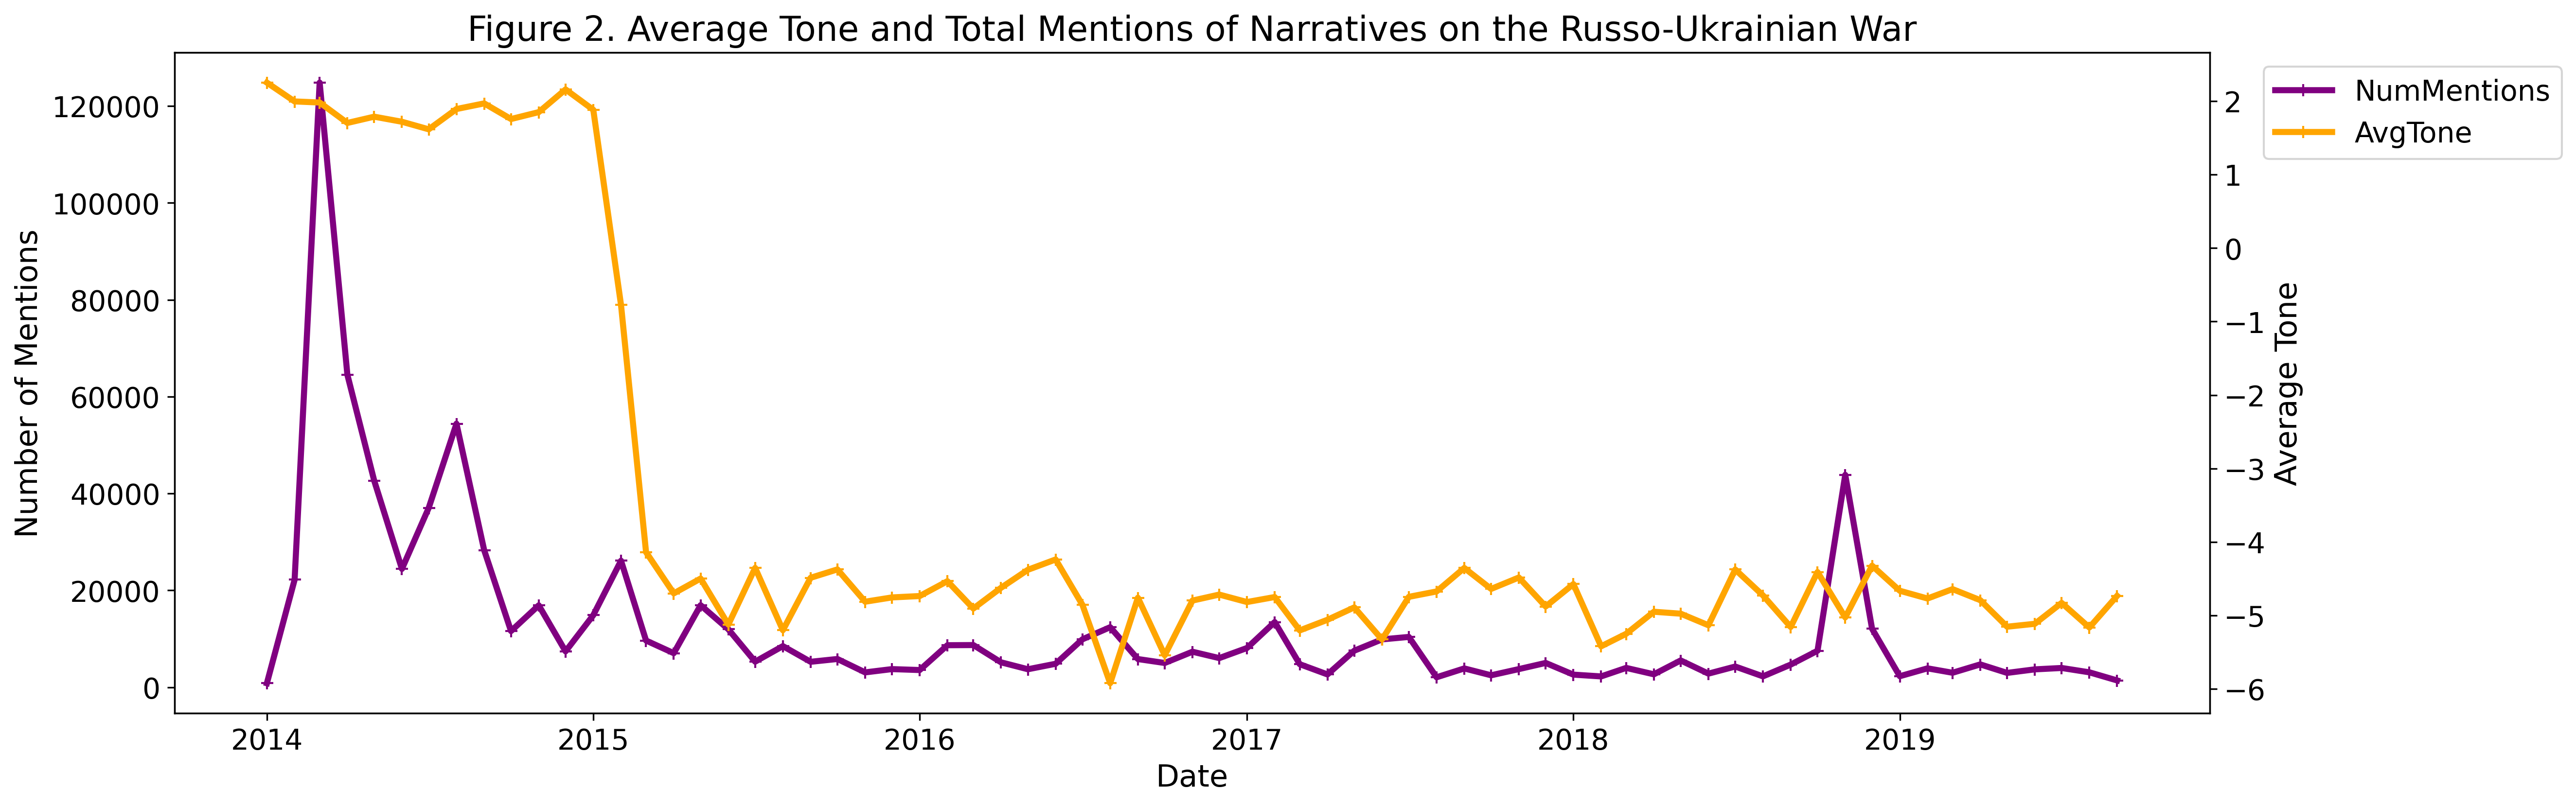

Above, we plot the tone and mentions of narratives related to the war. We filtered all news reports with any of the following: `war`, `conflict`, `aggress`, `crisis`, `invade`, `attack`, and `invasion`. The following are salient peaks during The Russo-Ukrainian War: 

1. The highest peak, both in `NumMentions` and `AvgTone` was when the war started in 20 February 2014. On this date, Russia has officially decided to annex Crimea which, before this date, is considered as part of Ukraine ([Cathcart, 2014](#cathcart)). Immediately the next day, Russian troops proceeded to Crimea. Interestingly, there is a high number of `AvgTone` for the entirely of 2014. We attribute this to Ukraine’s attempt to fight against Russia’s takeover of Crimea, which reports may have positively covered (similar to a David vs. Goliath narrative). 
2. The peak for `NumMentions` during the latter year of 2018 is related to different events, from the implementation of Martial Law, in areas near to Russian military presence, up to the escalation related to the Kerch Strait, an area of economic interest ([BBC News, 2018](#bbc) & [Farquahar, 2018](#macfarquhar)).
3. Finally, `AvgTone` has consistently been low after 2014, when the war continued to rage on in the area.

In [24]:
print('Table 21. Source URLs of Narratives with and Average Tone of Narratives'
      ' specific to Russian-Ukraine War')

source_df = spark.sql("""SELECT DISTINCT MonthYear,
                                         NumMentions,
                                         AvgTone,
                                         SOURCEURL
            FROM (
                  SELECT to_date(CAST(MonthYear as string), 'yyyyMM')
                                                as MonthYear,
                         NumMentions,
                         AvgTone,
                         SOURCEURL
                  FROM df
                  WHERE ((df.Actor1CountryCode = 'UKR' and
                          df.Actor2CountryCode = 'RUS') or
                         (df.Actor2CountryCode = 'UKR' and
                          df.Actor1CountryCode = 'RUS')) and
                         (rlike(df.SOURCEURL,
                         "(?i).*?(war|conflict|aggress|crisis|invade\n
                         |attack|invasion).*?"))
                  )
            order by AvgTone asc
             """)
source_df.show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 21. Source URLs of Narratives with and Average Tone of Narratives specific to Russian-Ukraine War
+----------+-----------+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|MonthYear |NumMentions|AvgTone             |SOURCEURL                                                                                                                                              |
+----------+-----------+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|2014-09-01|10         |-0.00128708094765197|http://www.euronews.com/2015/09/30/syria-conflict-russian-parliament-gives-green-light-for-use-of-military-force/                                      |
|2016-03-01|9          |-0.00652162886134999|http://www.csmonitor.com/USA/Foreign-Policy/2016/0317/Putin

The table above shows the top ten news articles with the lowest `AvgTone` about the Russo-Ukrainian War. For example, the source http://www.csmonitor.com/USA/Foreign-Policy/2016/0317/Putin-s-Syria-war-a-glimpse-of-what-West-won-t-do-anymore portrayed a negative media tone towards the war.

In [25]:
print('Percent (%) of news covering Russo-Ukrainian war globally '
      'over the last 6 years:', 
      ((source_df.count() / df.count())*100)
     )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Percent (%) of news covering Russo-Ukrainian war globally over the last 6 years: 0.017816174713245873

In [26]:
print('Total number of news covering Russo-Ukrainian war globally '
      'over the last 6 years:', source_df.count()
     )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of news covering Russo-Ukrainian war globally over the last 6 years: 63461

By reviewing the source URL (`SOURCEURL`), we can observe the number of mentions and average tone for news and narratives involving Russia and Ukraine that include the phrases war, invasion, invade, aggress, assault, crisis, and conflict for the years 2014 to 2019. The collection contains around 830,000 mentions of the Russo-Ukrainian war. Furthermore, the Russo-Ukrainian war was covered in around ~63,000 news articles, accounting for about `0.02%` of all news mentions worldwide over the last six years.


## Impact: What is the theoretical potential (positive and negative) impact on the stability of a country?
Below, we provide visualizations of each date’s average Goldstein score. It captures “the theoretical potential impact that type of event will have on the stability of a country”. 

In [27]:
print('Table 22. GoldsteinScale Statistical Table')
df.select(df.GoldsteinScale).filter(
          df['GoldsteinScale'] != '').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Table 22. GoldsteinScale Statistical Table
+-------+------------------+
|summary|    GoldsteinScale|
+-------+------------------+
|  count|         356197373|
|   mean|0.5084105493966123|
| stddev| 4.706522296398608|
|    min|              -0.1|
|    max|               9.0|
+-------+------------------+

A higher score may mean a higher positive impact to the country (for example, extending military aid or humanitarian aid; all these aid in “stabilizing” a country). A lower score may mean the opposite (for example, police seizure, protests, or sanctions).

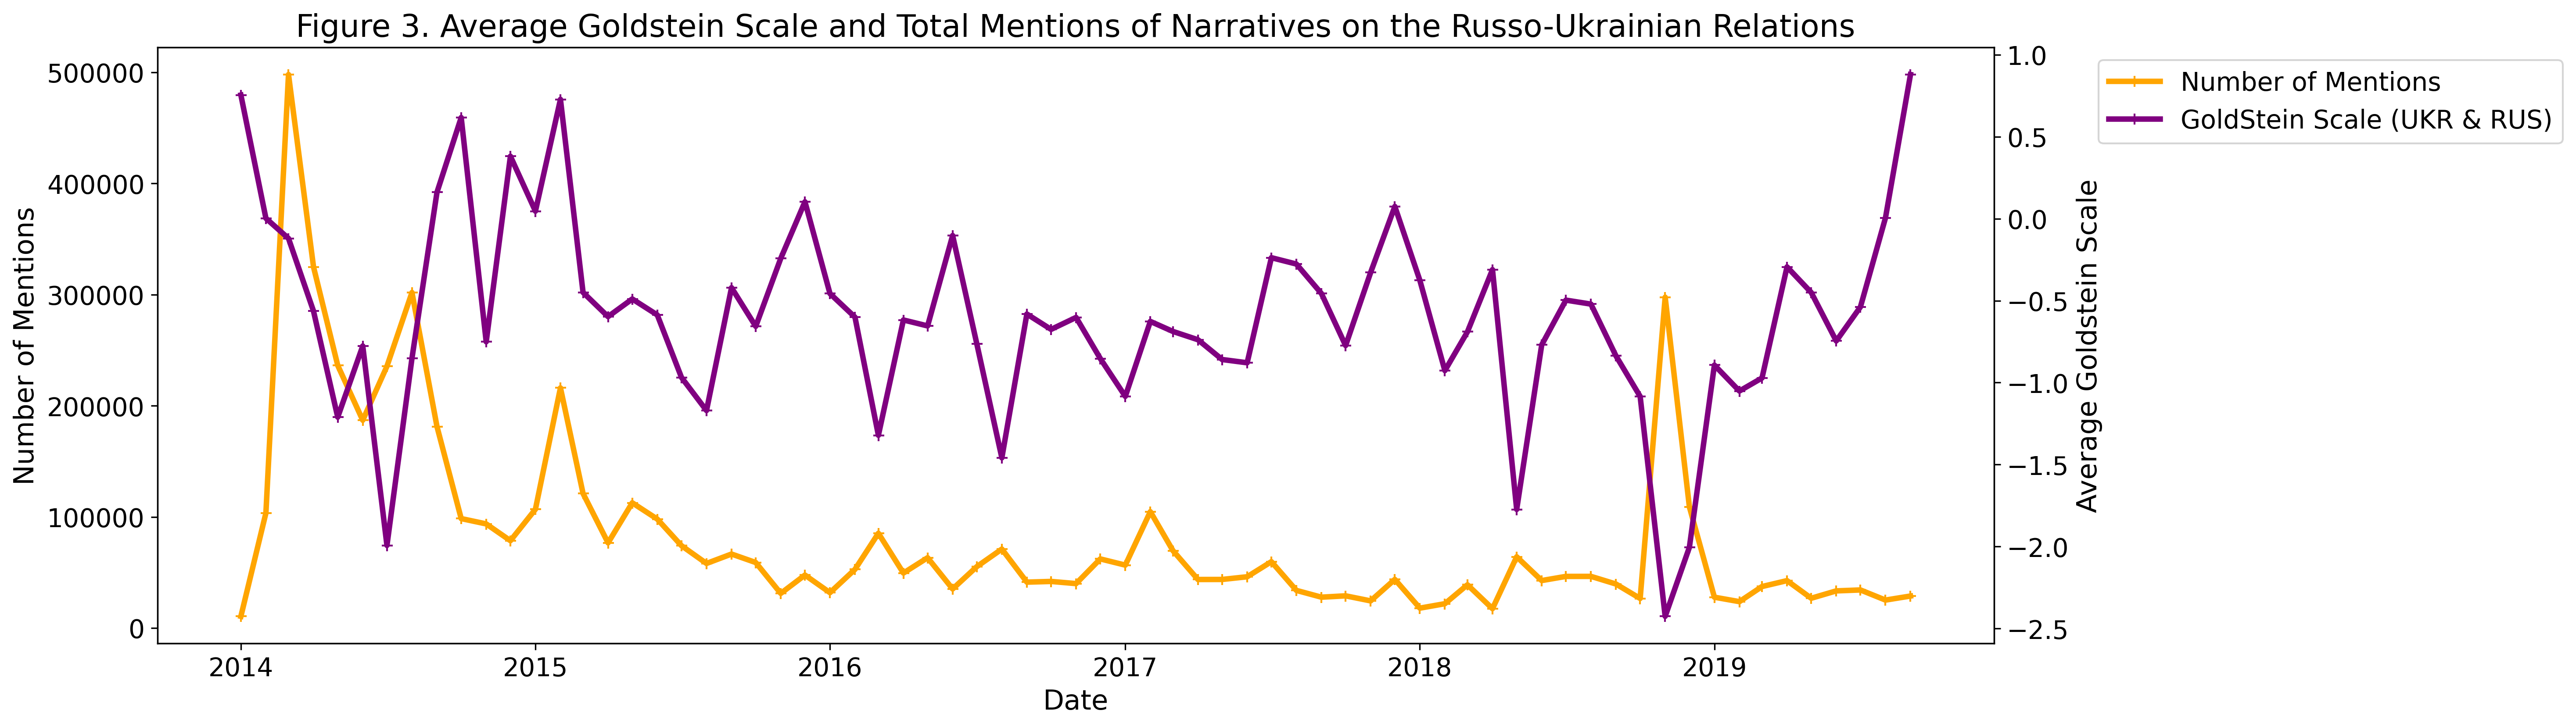

The number of mentions for Ukraine and Russia on the media increased significantly at the early start of 2014. This could be due to the Russo-Ukrainian War which started in the February of 2014. The Goldstein Scale across 2014 to 2019, as shown in the purple line plot above, has consistently been very low – below `0.0` – given the unresolved conflict and repeating tensions between both actors in the war.

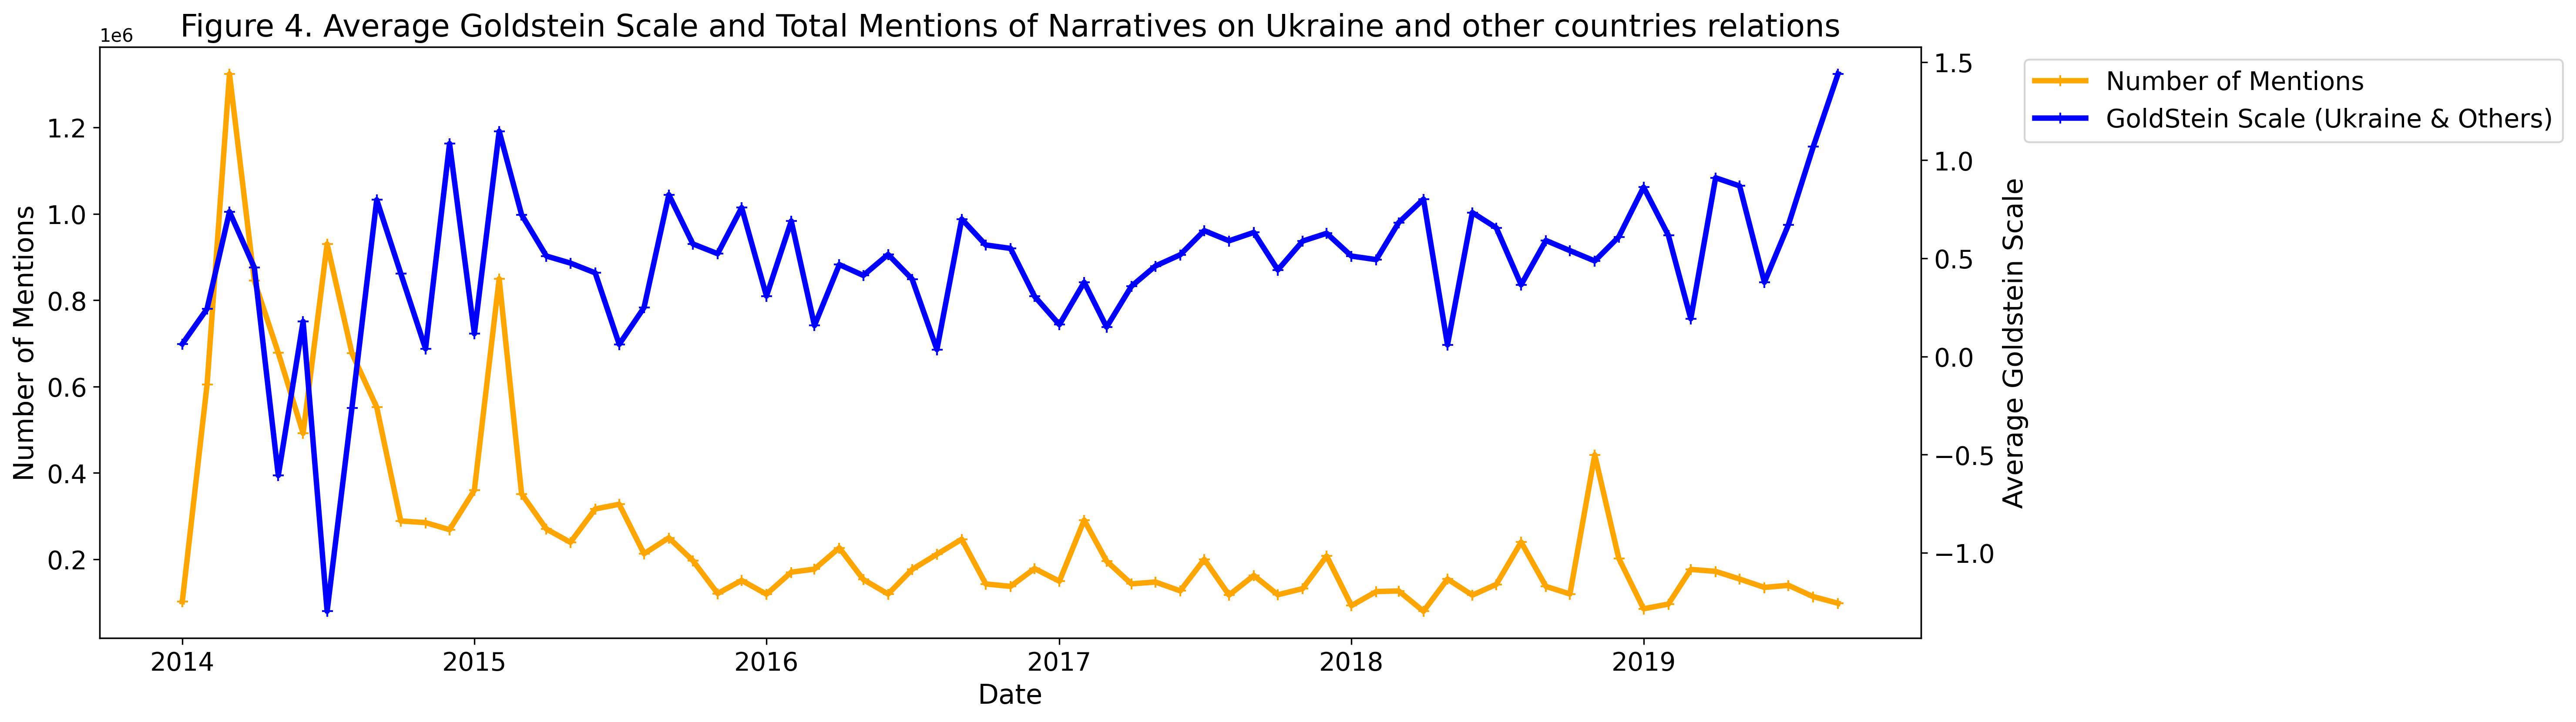

As seen above, the figure is close to the Goldstein Scale provided earlier. The start of the war provided low scores for the most part of 2014, possibly as other countries aim to “denounce” or “warn” Ukraine in its participation in the war, including its handling of pro-Russian citizens. However, from 2015 onwards, its Goldstein Score has consistently been greater than `0.0`, which may indicate the support it receives from other countries.

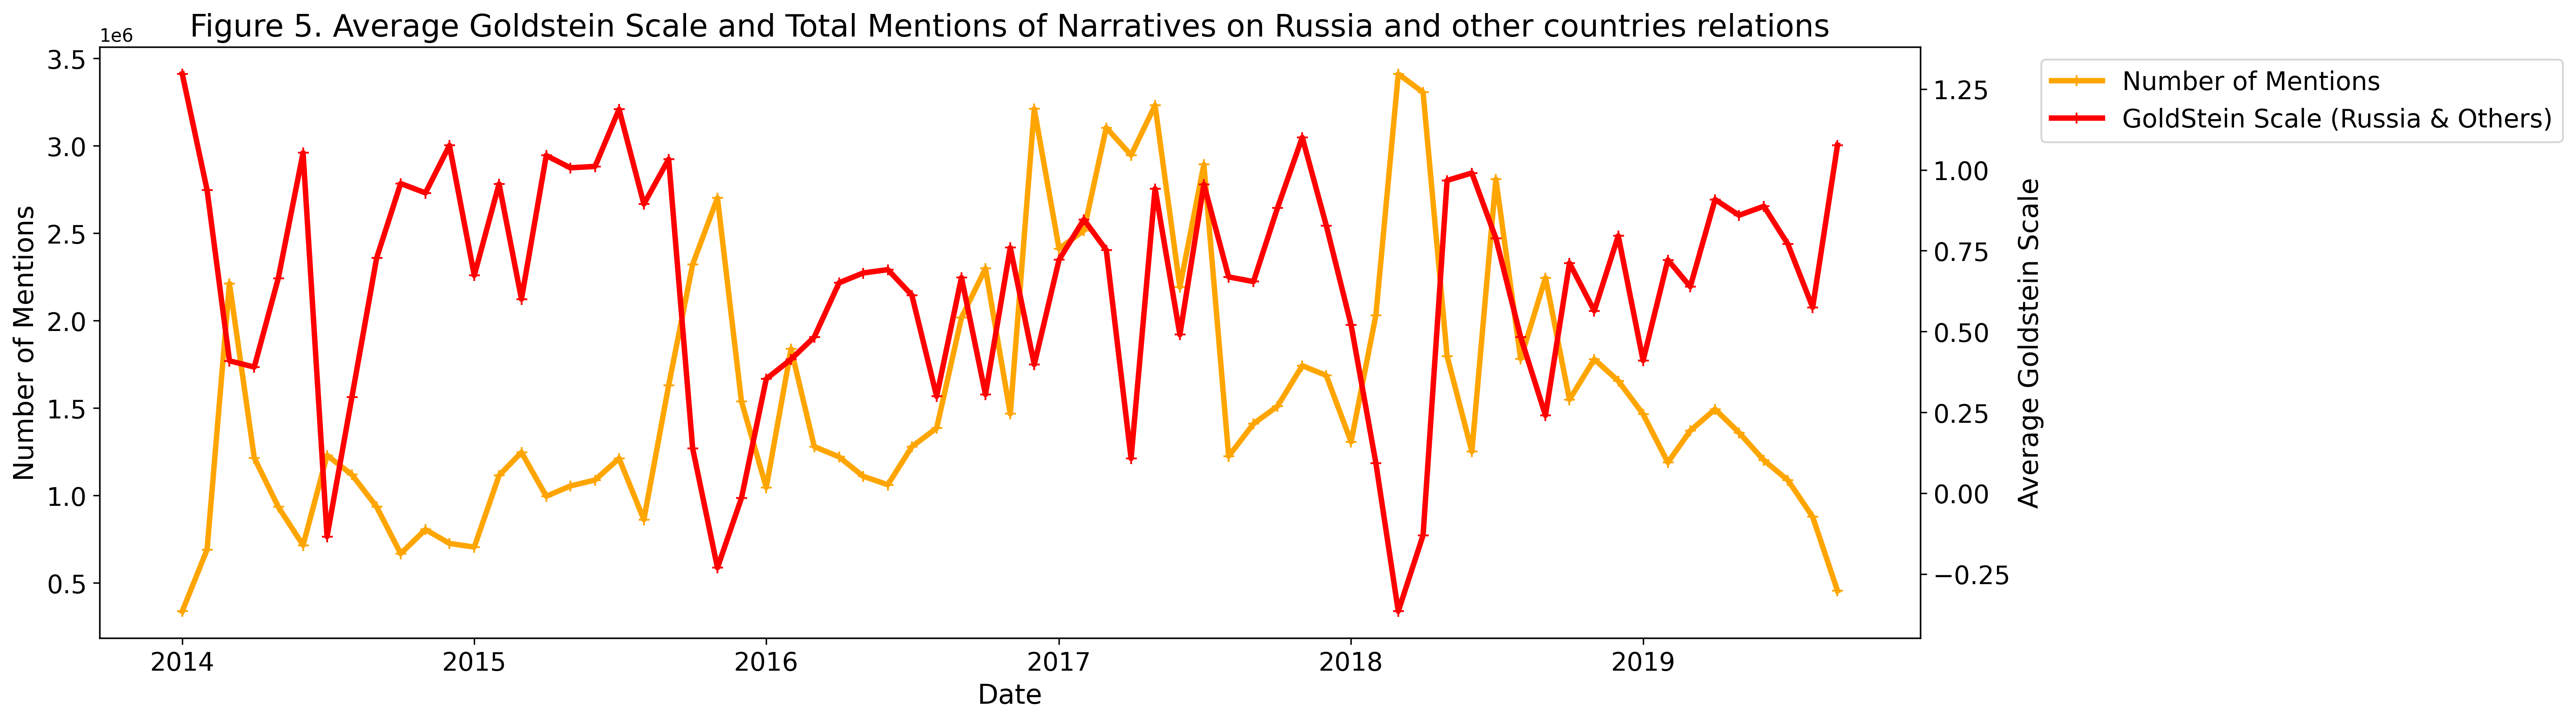

The above figure shows the Goldstein Score for Russia and its relation with other countries. We see that, at certain times, it has dropped, but not as drastically as Ukraine’s. This could be due to the larger political power that Russia has along with other countries, including its relations with its Western counterparts. It experience its first drop during the start of the war in early 2014; it has further reduced during the earlier part of 2018, which refers to the tension at the Kerch Strait as earlier stated.

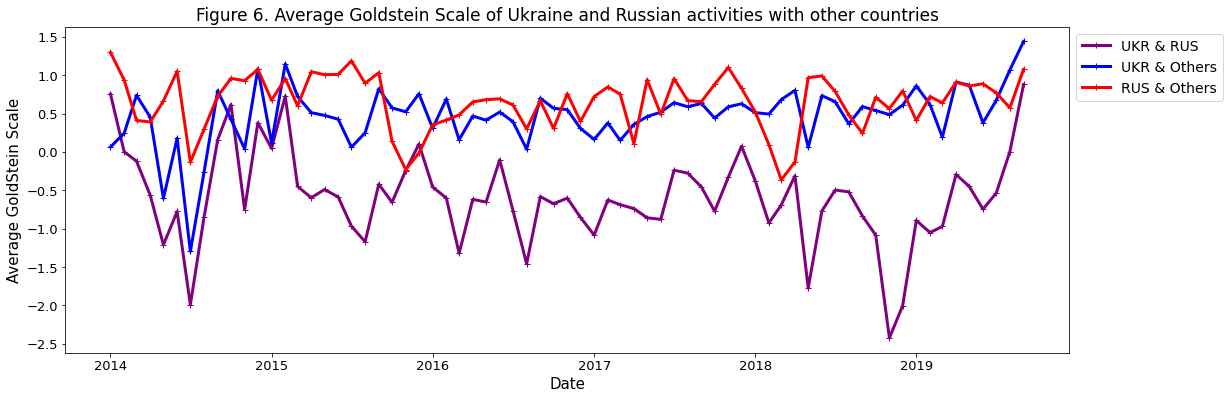

Finally, we plot the above scales together. Important here is that the relationship between Ukraine and Russia (described in the purple line plot above) has further led to each other’s instability. However, Russia’s relationship with others (red line plot) has never experienced a lower Goldstein Scale like that of Ukraine, given the political and economic power it holds in the region and worldwide.

# SUMMARY OF INSIGHTS
Any war is a choice made by an aggressor without regard for the aggressed. How it is perceived is also a choice made by the media. We provided a high-level analysis of the events surrounding the Russo-Ukrainian War on the available data, and have yielded the following insights:

1. **On Actors**: The portrayal of the media towards Russia almost always includes Vladimir Putin as decision-maker. Pro-Russian politicians like Andriy Klyuyev and Sergey Kiriyenko are portrayed in the media in positive tones. Because the Russian government has complete control over the broadcast media in Russia, there could be bias in how major Russian figures were portrayed by the media.
2. **On Perception**: The start of the Russo-Ukrainian War has provided positive `AvgTone` and higher `NumMentions` among news sources. This could be due to the influx of support from other countries to Ukraine as reported by the media – almost tapping at the David vs. Goliath narrative – at least for the initial months. Beyond its first year, however, both have lowered given the unexpected and prolonged duration of the war. It has again escalated 1.5 weeks ago.
3. **On Impact**: The Goldstein Scale provides the theoretical potential impact of an event to a country’s stability. 
   - The **Goldstein Scale for the relationship between Ukraine and Russia** has consistently been low, indicating that their actions towards each other are leading to each other’s instability. 
   - **Ukraine’s Goldstein Scale with other countries** experienced an initially very low score during 2014 but has since picked up after support was provided by other governments. 
   - **Russia’s Goldstein Scale with other countries** has almost never been negative nor as low as Ukraine’s, owing to its massive political and economic power.

# RECOMMENDATIONS
1. **Further research can be conducted to validate the above findings**. The above insights were generated based on the years 2014 and 2019 only. However, wars do not exist in a vacuum; the escalation has existed for many decades, and it only has reached its peak at the start of the war. Knowing the historical context will help validate the above insights. 
2. **It will be useful to collect information for 2020 and 2021 and to complete the picture of understanding the 2022 Invasion**. Tensions between Ukraine and Russia for 2020 and 2021 have slightly reduced because of the focus on the COVID-19 pandemic. However, the war did not stop during this time. It may be important to know the events between these years to fully understand how they escalated leading up to the 2022 Russian Invasion of Ukraine.
3. **Encourage media outlets to work against misinformation**. Finally, state-sponsored media outlets have persisted for many years, which can greatly influence perceptions of people towards the war (or any topic for that matter). There is a public interest for the government and civil society organizations to promote responsible consumption of online media, including in matters that may not be directly nor immediately related to a particular country.

# REFERENCES
<a id='bbc'>BBC News. (2018).</a> Russia-Ukraine sea clash in 300 words. BBC News. Retrieved 06 March 2022 from https://www.bbc.com/news/world-europe-46345697 

<a id='cathcart'>Cathcart, W. (2017).</a> Putin’s Crimean medal of honor, forged before the war even began. The Daily Beast. Retrieved 06 March 2022 from https://www.thedailybeast.com/putins-crimean-medal-of-honor-forged-before-the-war-even-began 

<a id='dress'>Dress, B. (2022).</a> Russia demanding that Ukraine demilitarize. The Hill. Retrieved 06 March 2022 from https://thehill.com/policy/international/596551-russia-demanding-that-ukraine-demilitarize 

<a id='gdelt'>GDELT Project (2020).</a> Global Database of Events, Language and Tone (GDELT). Retrieved 06 March 2022 from https://registry.opendata.aws/gdelt 

<a id='kharkiv'>Kharkiv, Kiev and Lviv (2014).</a> The February revolution. The Economist. Retrieved 06 March 2022 from https://www.economist.com/briefing/2014/02/27/the-february-revolution 

<a id='kyiv'>Kyiv Post (2013).</a> Parliament passes statement on Ukraine’s aspirations for European integration. Kyiv Post. Retrieved 06 March 2022 from https://www.kyivpost.com/article/content/ukraine-politics/parliament-passes-statement-on-ukraines-aspirations-for-european-integration-320792.html 

<a id='macfarquhar'>MacFarquhar, N. (2018).</a> In standoff with Russia, what does Ukraine’s martial law decree mean? The New York Times. Retrieved 06 March 2022 from https://www.nytimes.com/2018/11/27/world/europe/ukraine-crimea-russia.html 

<a id='united'>United Nations (2014).</a> 68/262 Territorial integrity of Ukraine: Resolution adopted by the General Assembly on 27 March 2014. United Nations. Retrieved 06 March 2022 from https://www.securitycouncilreport.org/atf/cf/%7B65BFCF9B-6D27-4E9C-8CD3-CF6E4FF96FF9%7D/a_res_68_262.pdf 

# APPENDIX

## Screenshot of running EC2 instances
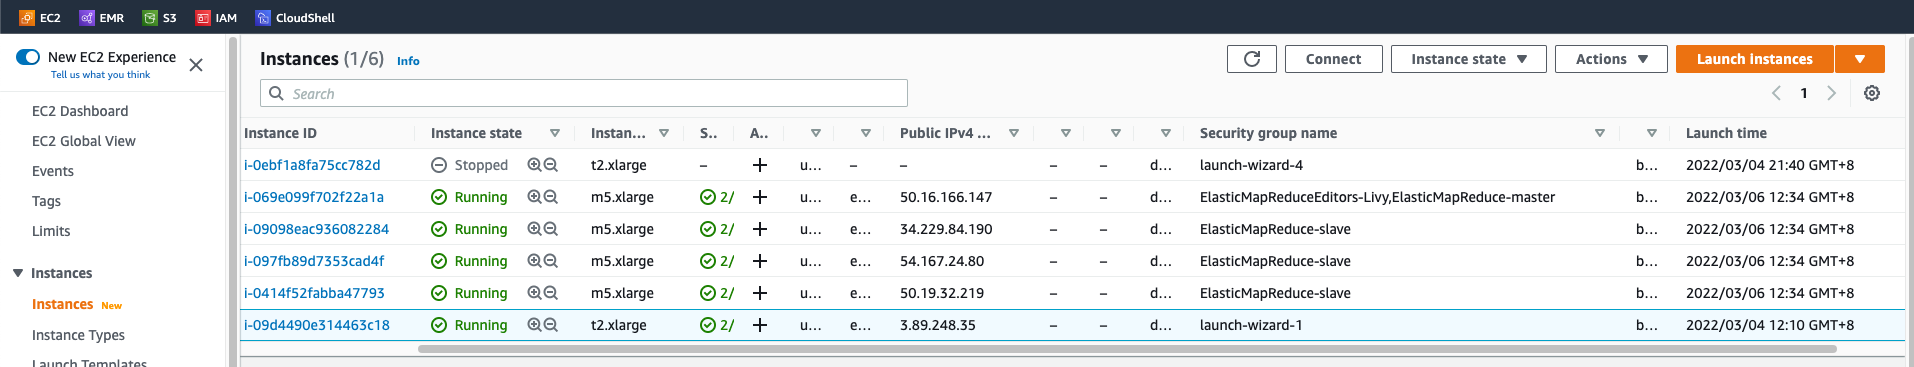

## Screenshot of running EMR instances
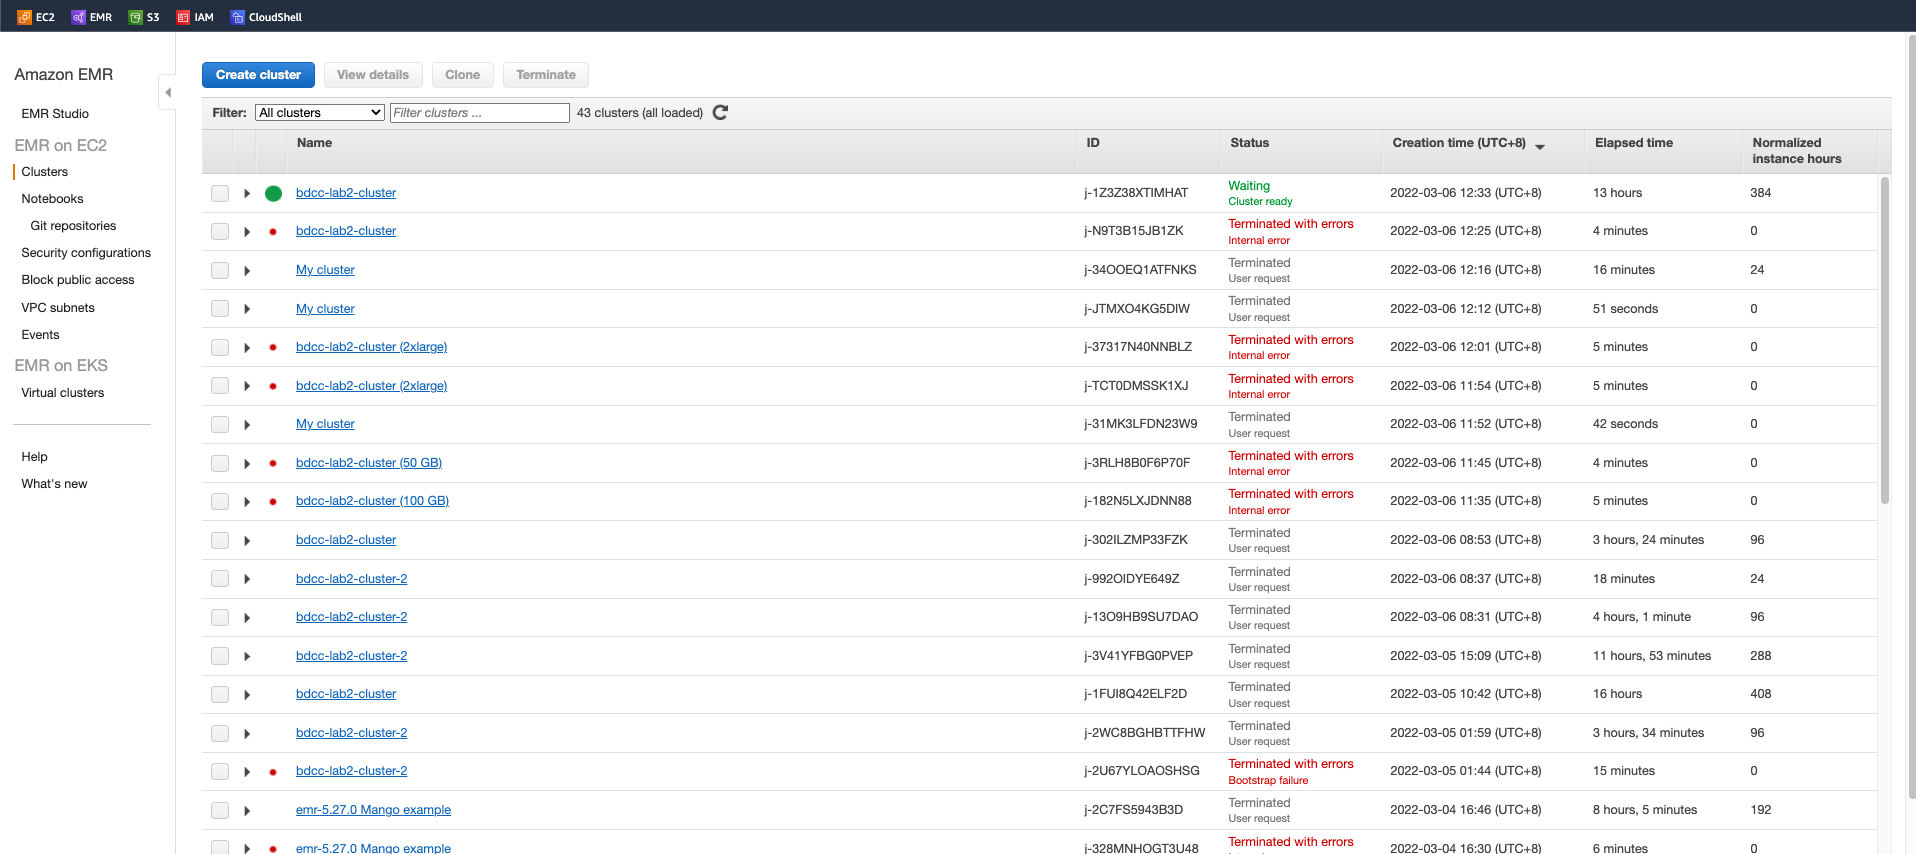

## Total size of the S3 dataset: 26.7 GB (from a 4.5 TiB bucket)

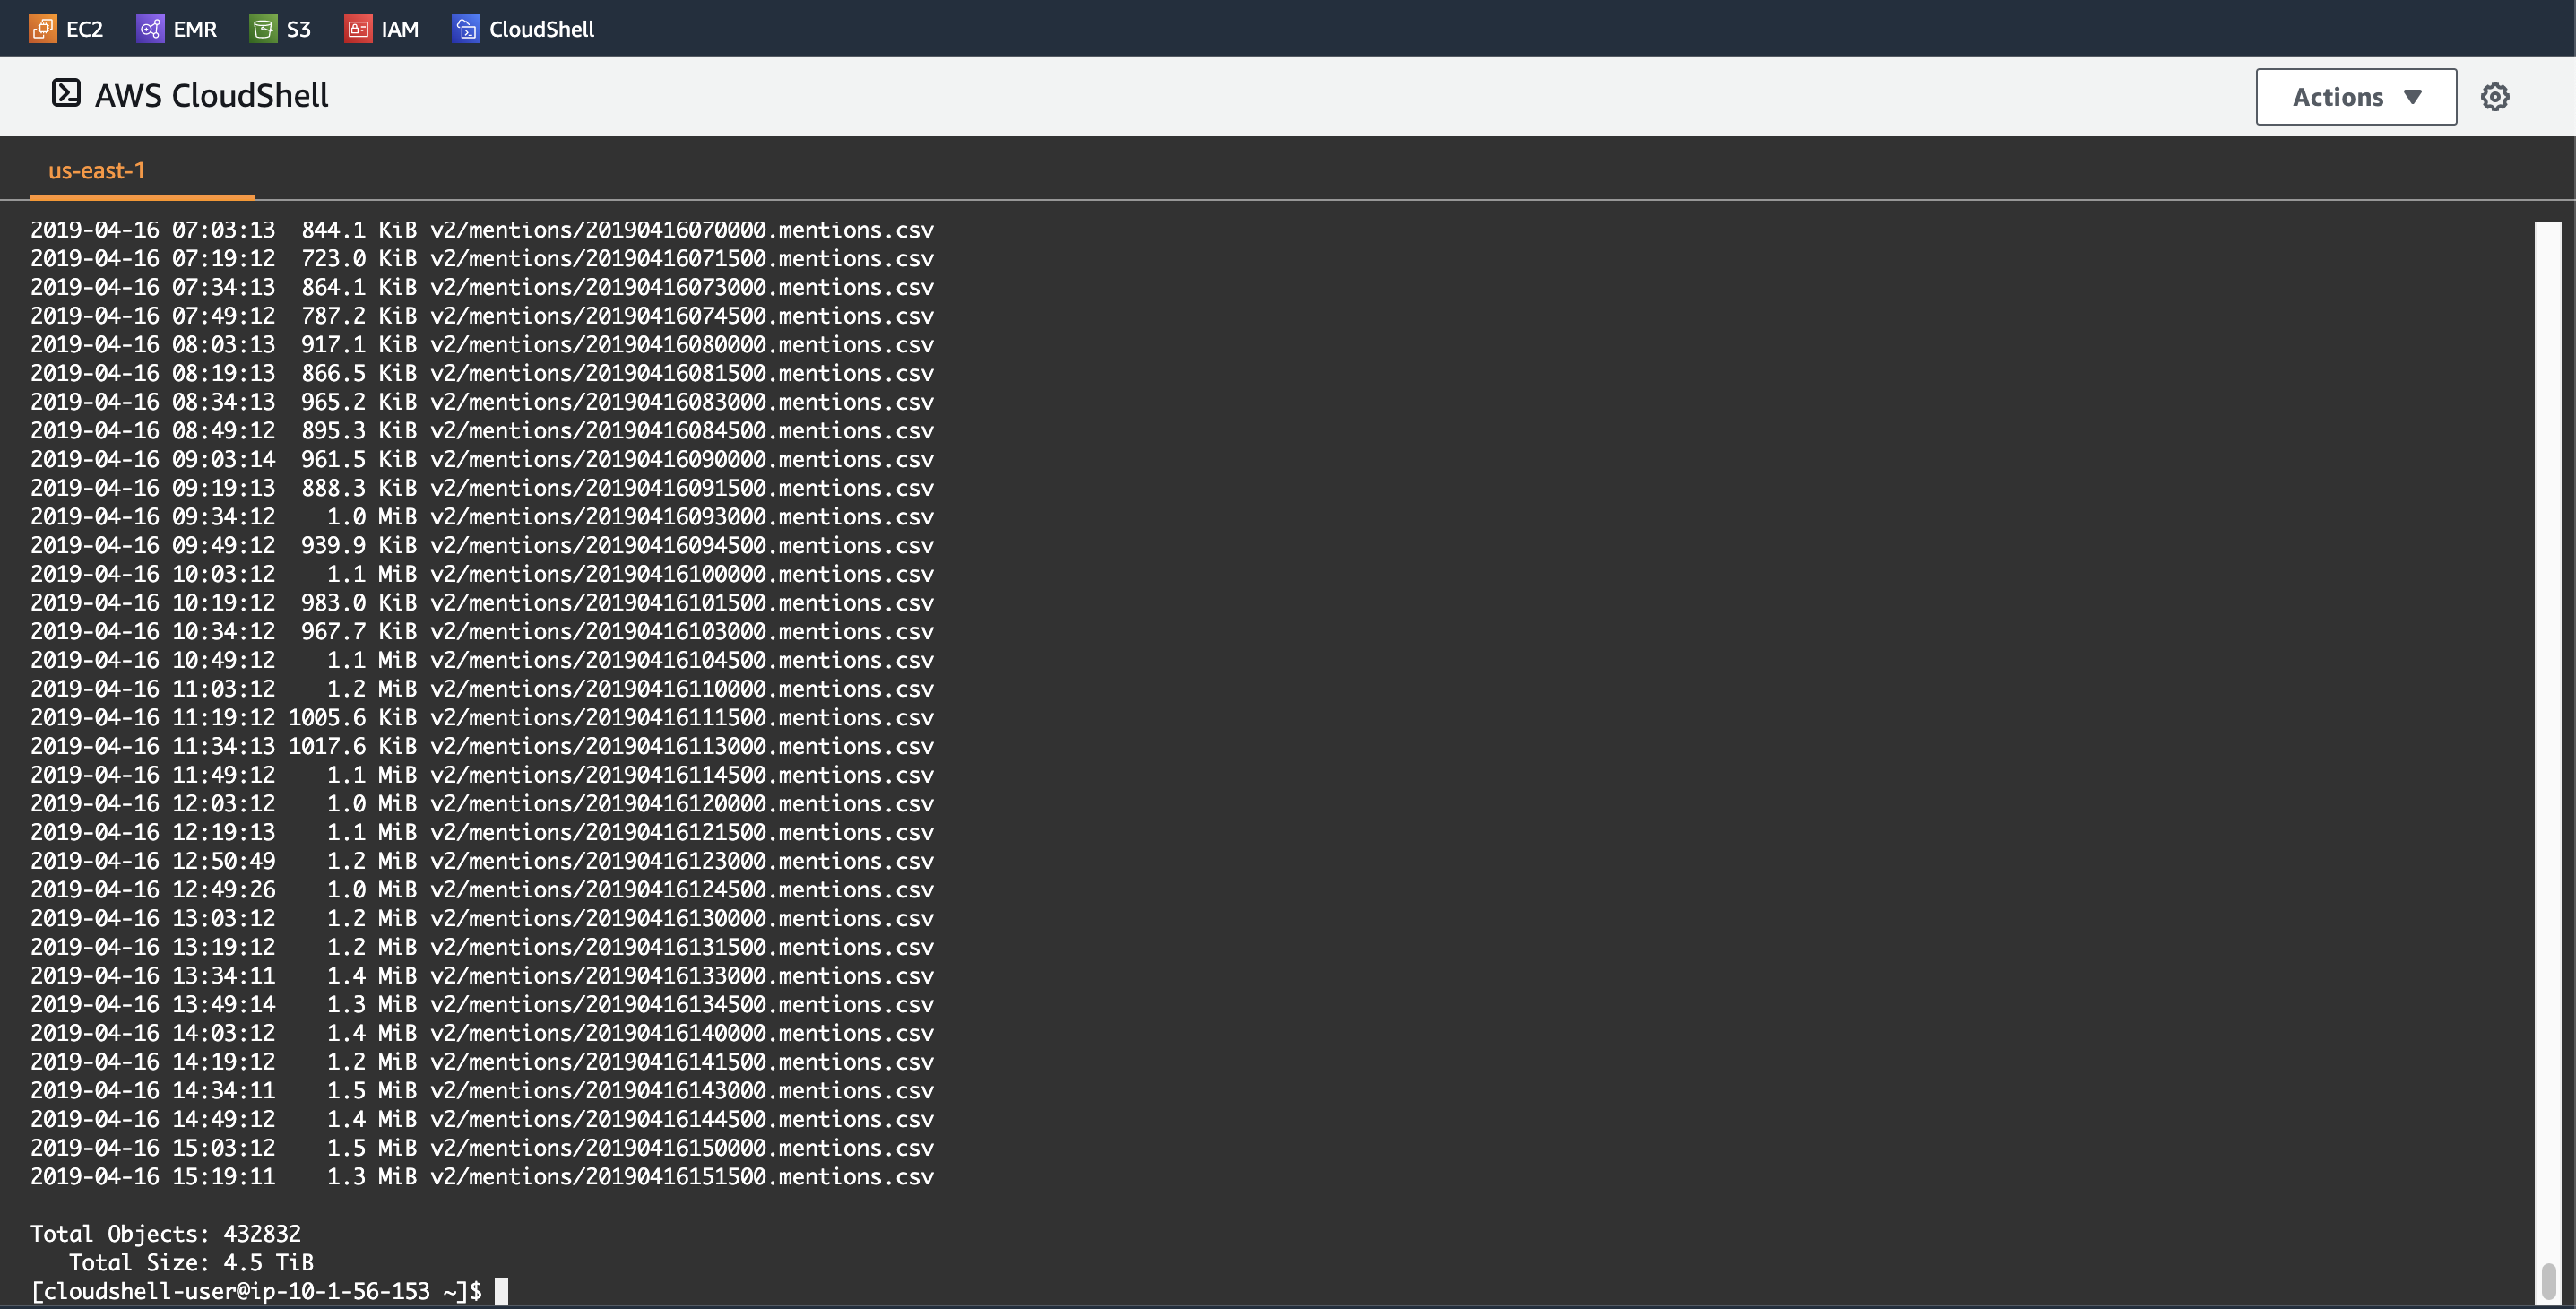

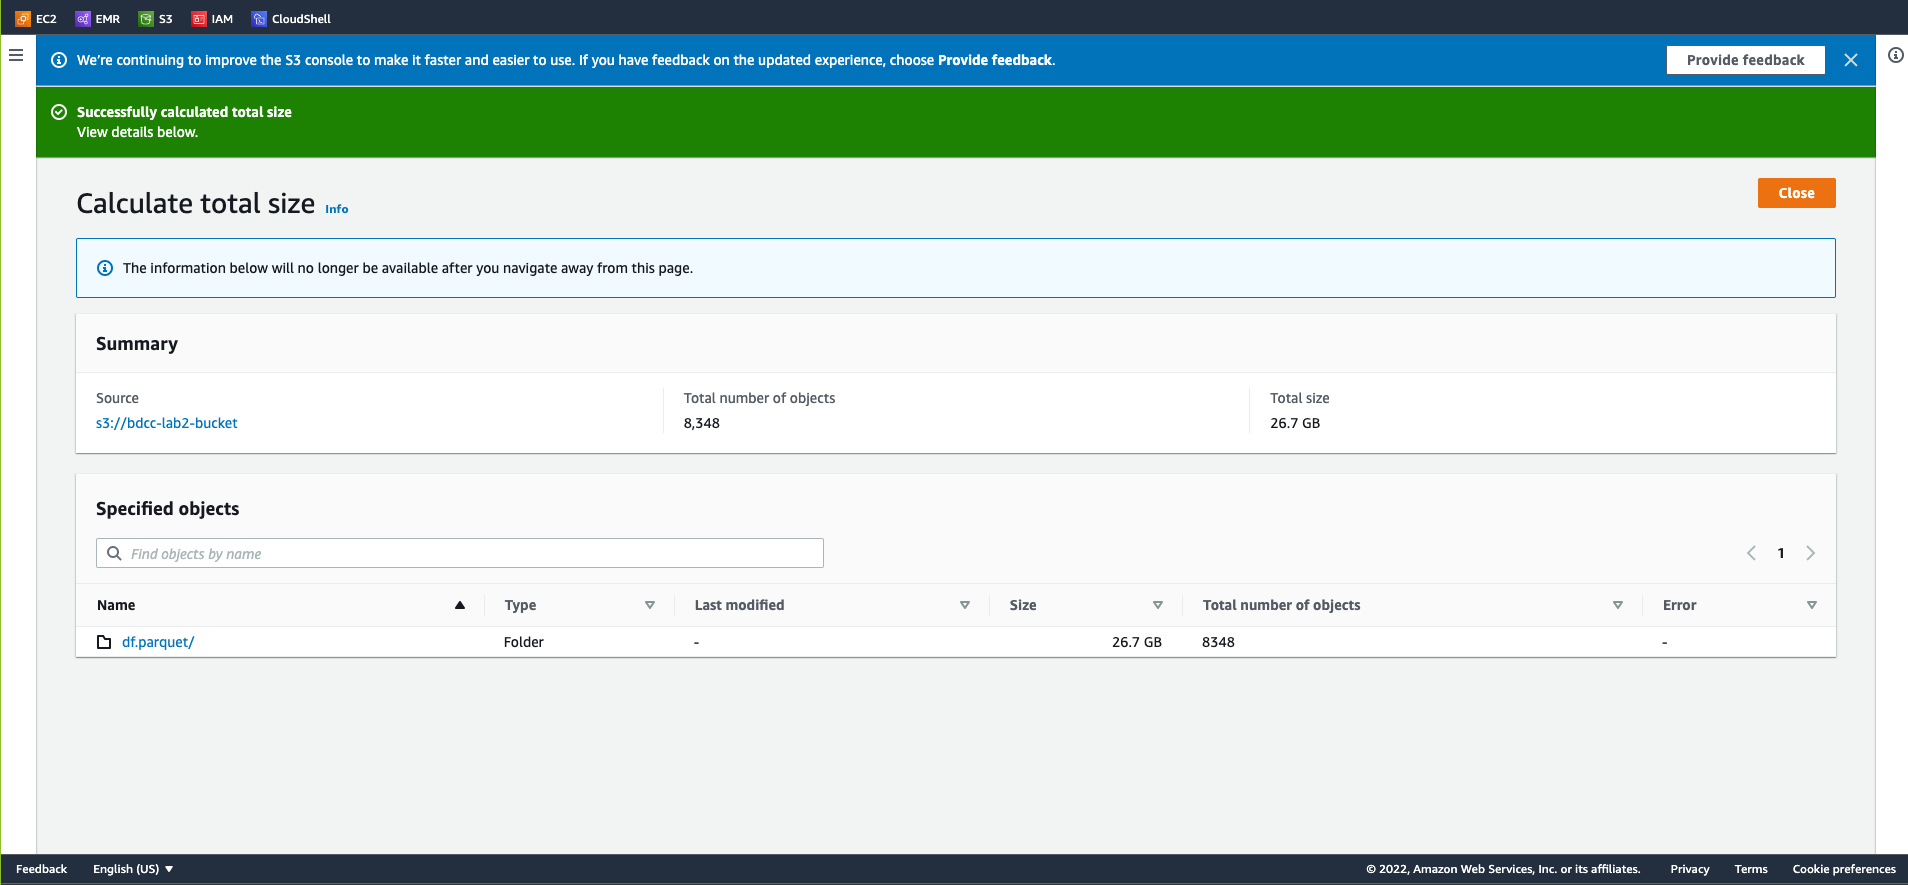

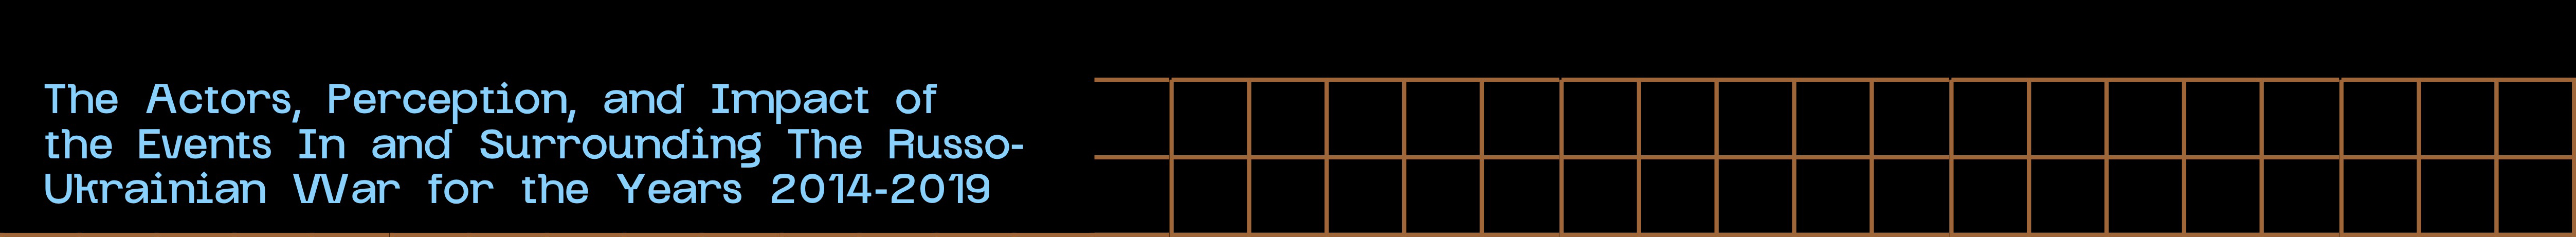